In [1]:
# 基本ライブラリ
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import numpy.random as rd
import gc
import multiprocessing as mp
import os
import sys
import pickle
from collections import defaultdict
from glob import glob
import math
from datetime import datetime as dt
from pathlib import Path
import scipy.stats as st
import re
import shutil
from tqdm import tqdm_notebook as tqdm
import datetime
ts_conv = np.vectorize(datetime.datetime.fromtimestamp) # 秒ut(10桁) ⇒ 日付

# グラフ描画系
import matplotlib
from matplotlib import font_manager
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc

from matplotlib import animation as ani
from IPython.display import Image

plt.rcParams["patch.force_edgecolor"] = True
#rc('text', usetex=True)
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
sns.set(style="whitegrid", palette="muted", color_codes=True)
sns.set_style("whitegrid", {'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

#カラム内の文字数。デフォルトは50
pd.set_option("display.max_colwidth", 100)

#行数
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
#
pd.options.display.float_format = '{:,.5f}'.format

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [51]:
import japanize_matplotlib

In [95]:
def get_min_max_bin(result_df):
    min_score = np.min([result_df.home_score.min(), result_df.away_score.min()])
    max_score = np.max([result_df.home_score.max(), result_df.away_score.max()])
    min_score, max_score
    return (min_score // 10)*10, (max_score//10)*10+10

def draw_timeseries_score(result_team):
    plt.figure(figsize=(15, 6))
    ax = plt.subplot(111)
    result_team.set_index("game_date").my_score.plot(ax=ax, zorder=0)
    ax.scatter(result_team.game_date, result_team.my_score, s=50, c=["r" if h else "k" for h in result_team.is_home], zorder=100)
    ax.hlines(result_team.my_score.mean(), result_team.game_date.min(), result_team.game_date.max(), "gray", zorder=-10)
    plt.title(f"team: {team}")
    plt.show()
    
def draw_score_hist(result_team):
    plt.figure(figsize=(10, 6))
    bins = np.arange(bin_min, bin_max, 5)
    result_team[result_team.is_home].my_score.hist(bins=bins, alpha=0.6, label="home")
    result_team[~result_team.is_home].my_score.hist(bins=bins, alpha=0.6, label="away")
    plt.legend(loc="best")
    plt.title(f"team: {team}")
    plt.show()

In [30]:
# data from: https://www.bleague.jp/schedule/
result_df = pd.read_csv("../data/bleague_game_result_2018.csv", index_col=0, parse_dates=["game_date"])

In [92]:
bin_min, bin_max = get_min_max_bin(result_df)

In [31]:
result_df.head()

,away_score,away_team,home_score,home_team,month,date,year,game_date
0,81,川崎,72,千葉,10,4,2018,2018-10-04
1,84,琉球,67,秋田,10,6,2018,2018-10-06
2,64,京都,77,三遠,10,6,2018,2018-10-06
3,78,新潟,73,滋賀,10,6,2018,2018-10-06
4,74,大阪,68,北海道,10,6,2018,2018-10-06


In [7]:
game_count = pd.Series(np.hstack([result_df.away_team.values, result_df.home_team.values])).value_counts()
game_count

秋田      60
北海道     60
京都      60
富山      60
A東京     60
琉球      60
福岡      60
大阪      60
三河      60
新潟      60
三遠      60
川崎      60
滋賀      60
SR渋谷    60
名古屋D    60
横浜      60
千葉      60
栃木      60
dtype: int64

In [33]:
team = game_count.index.values[0]

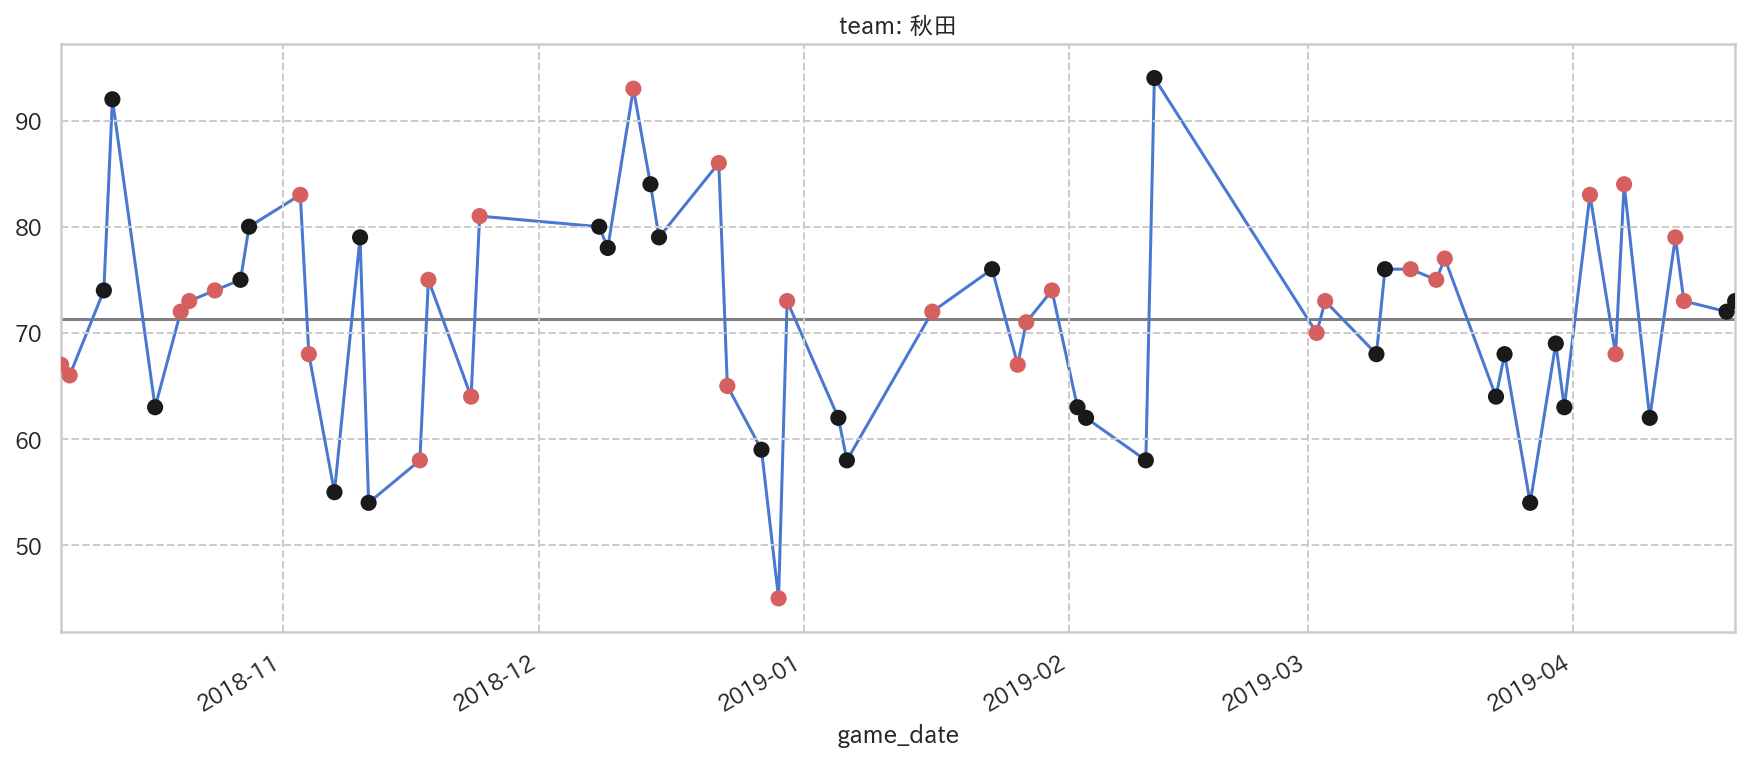

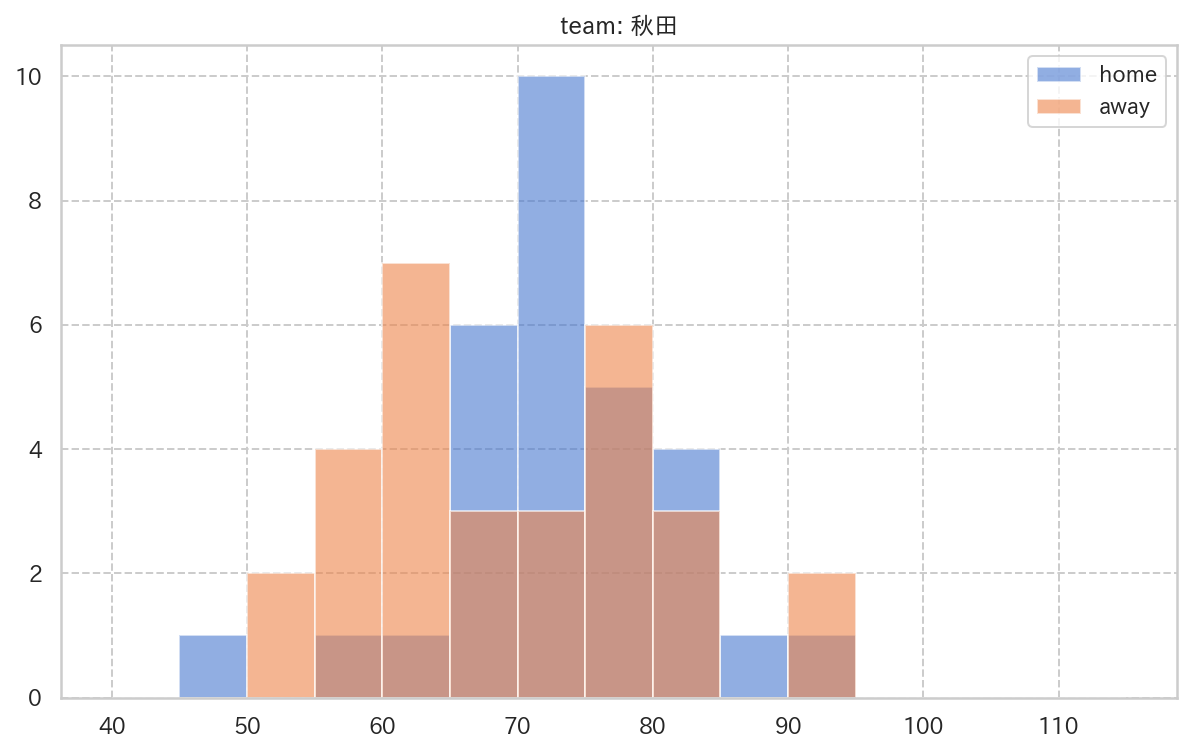

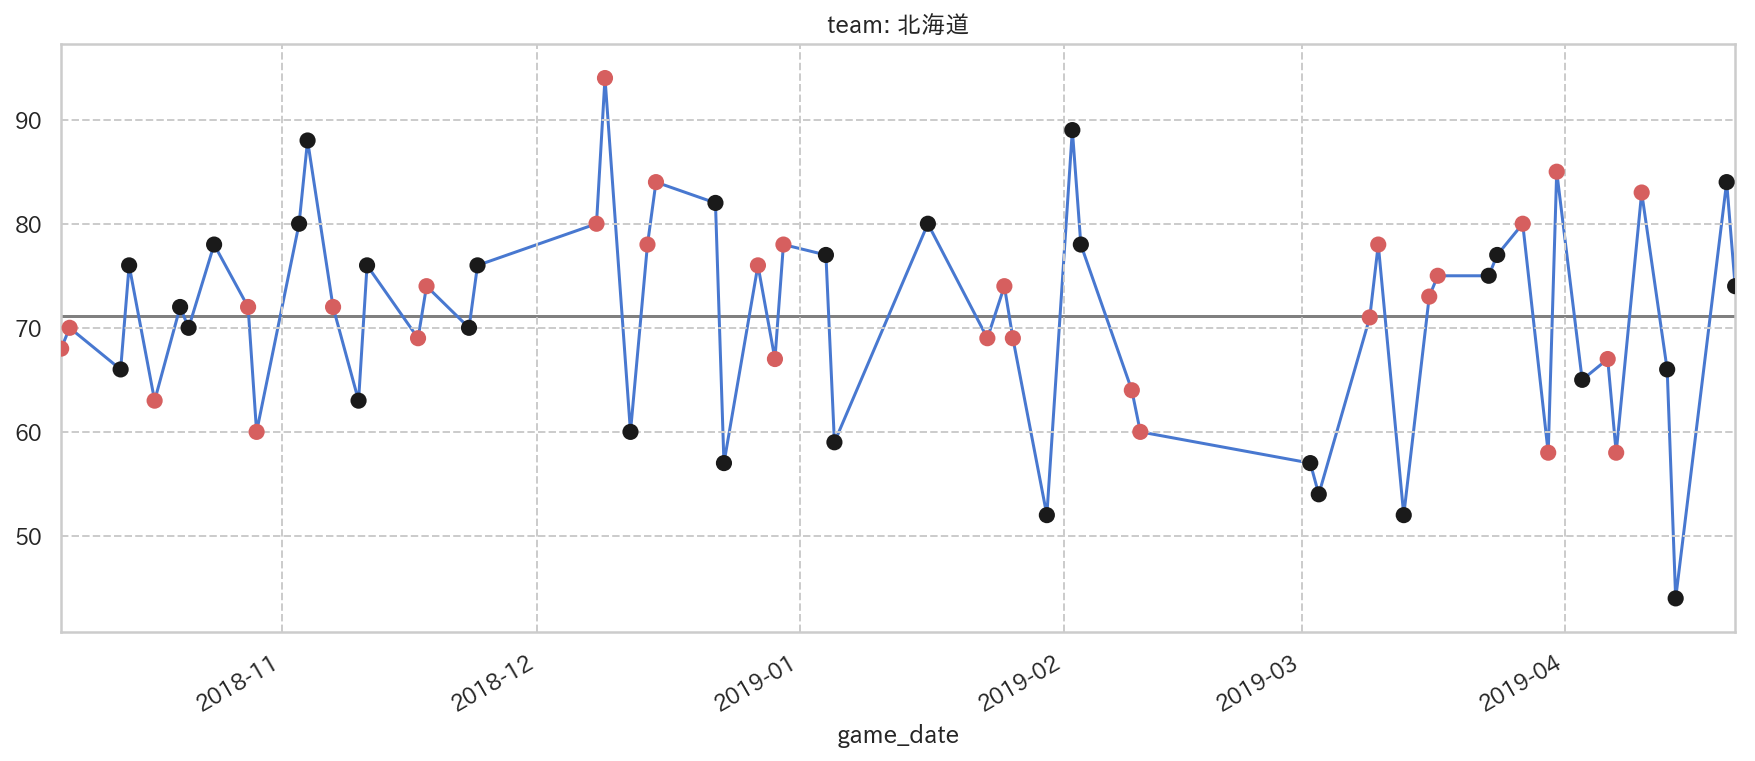

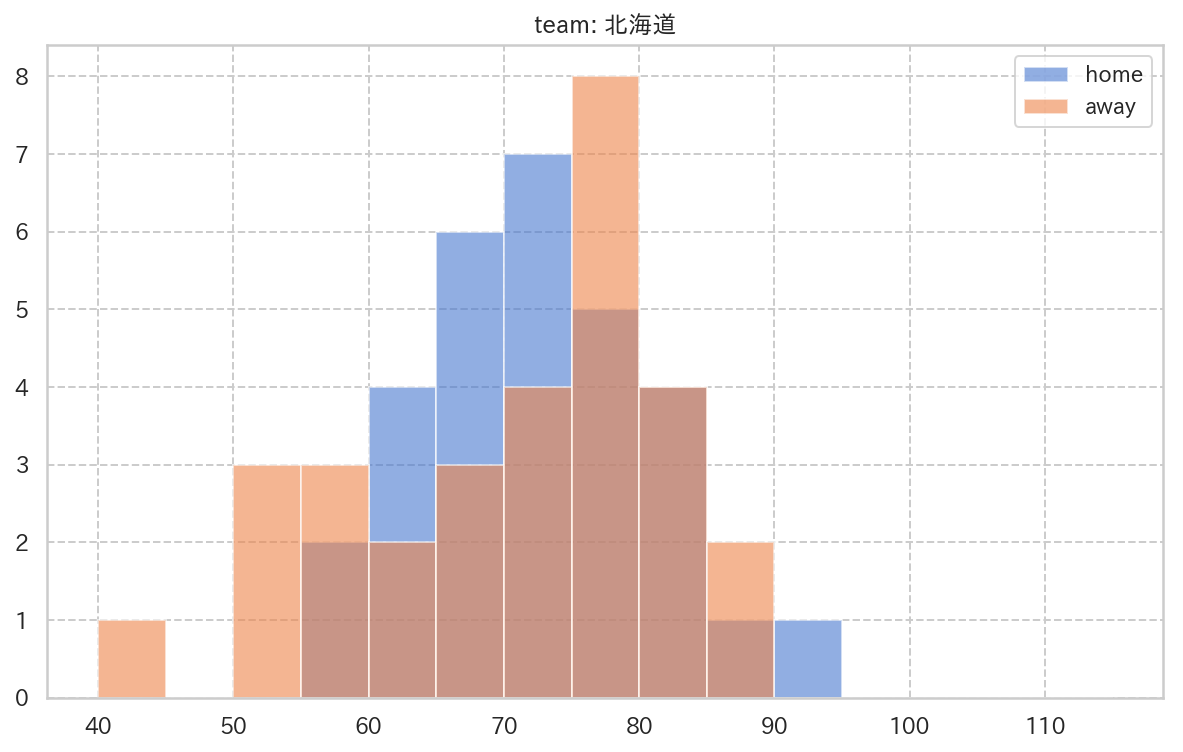

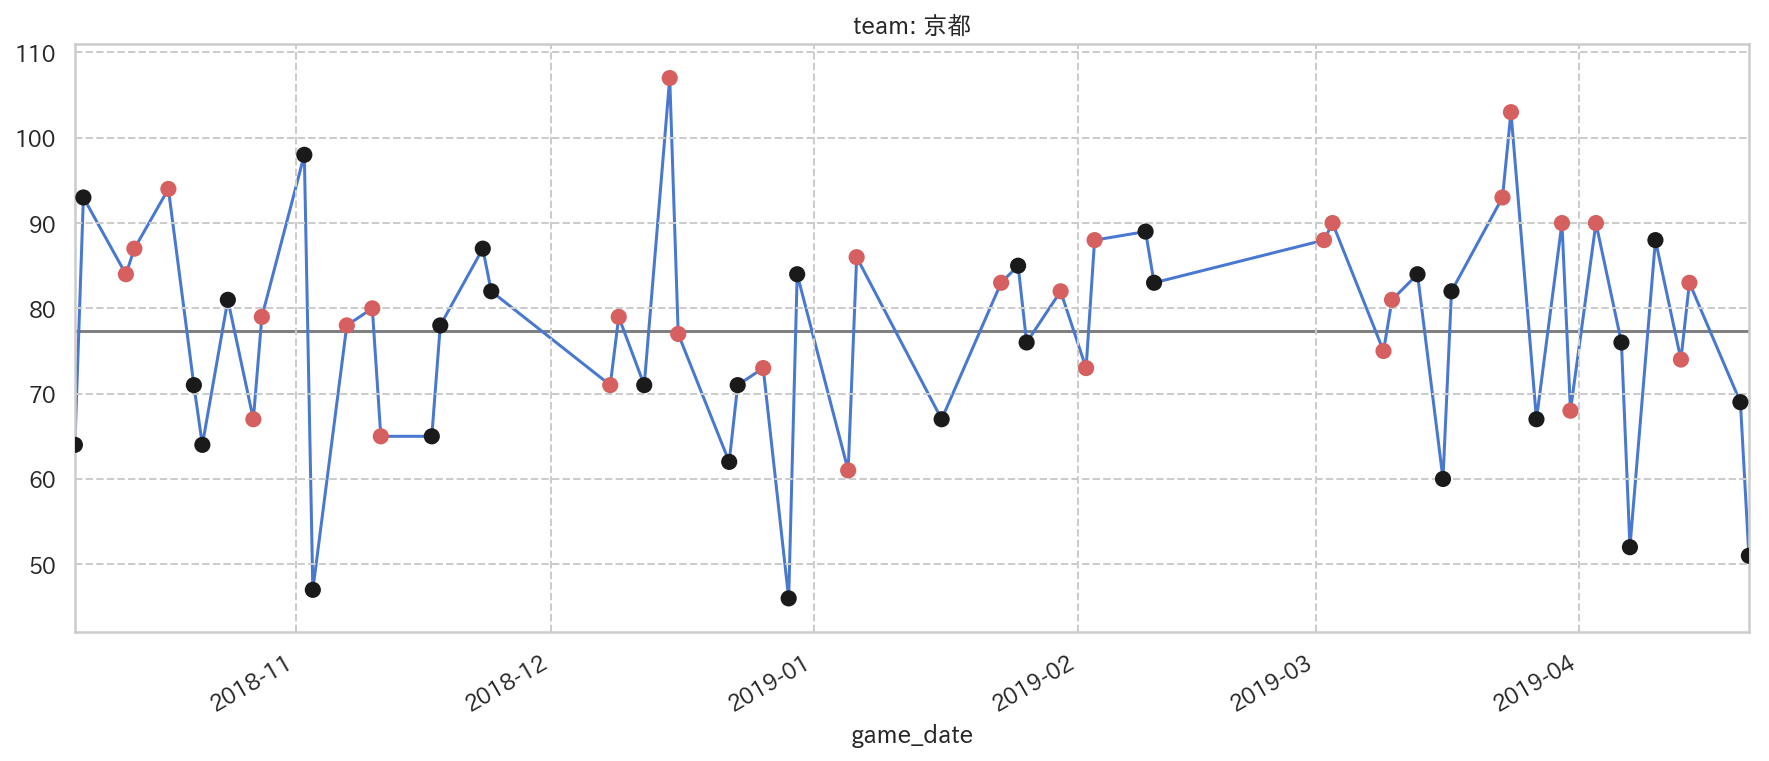

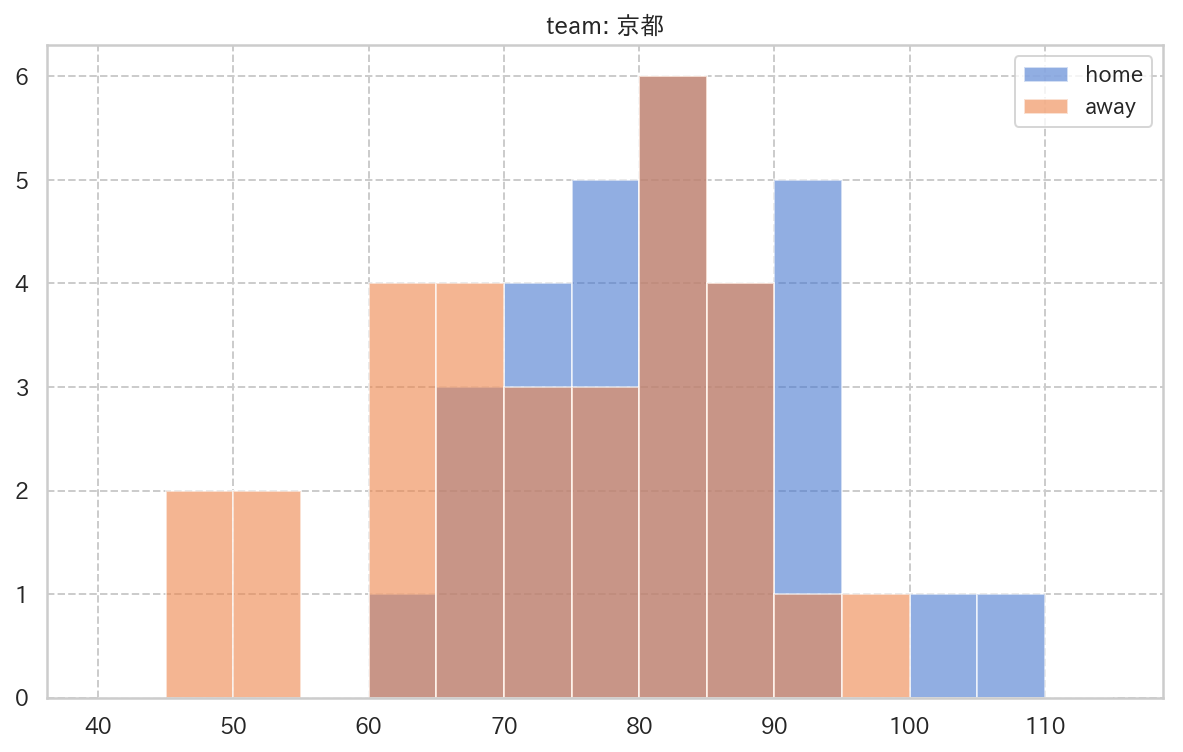

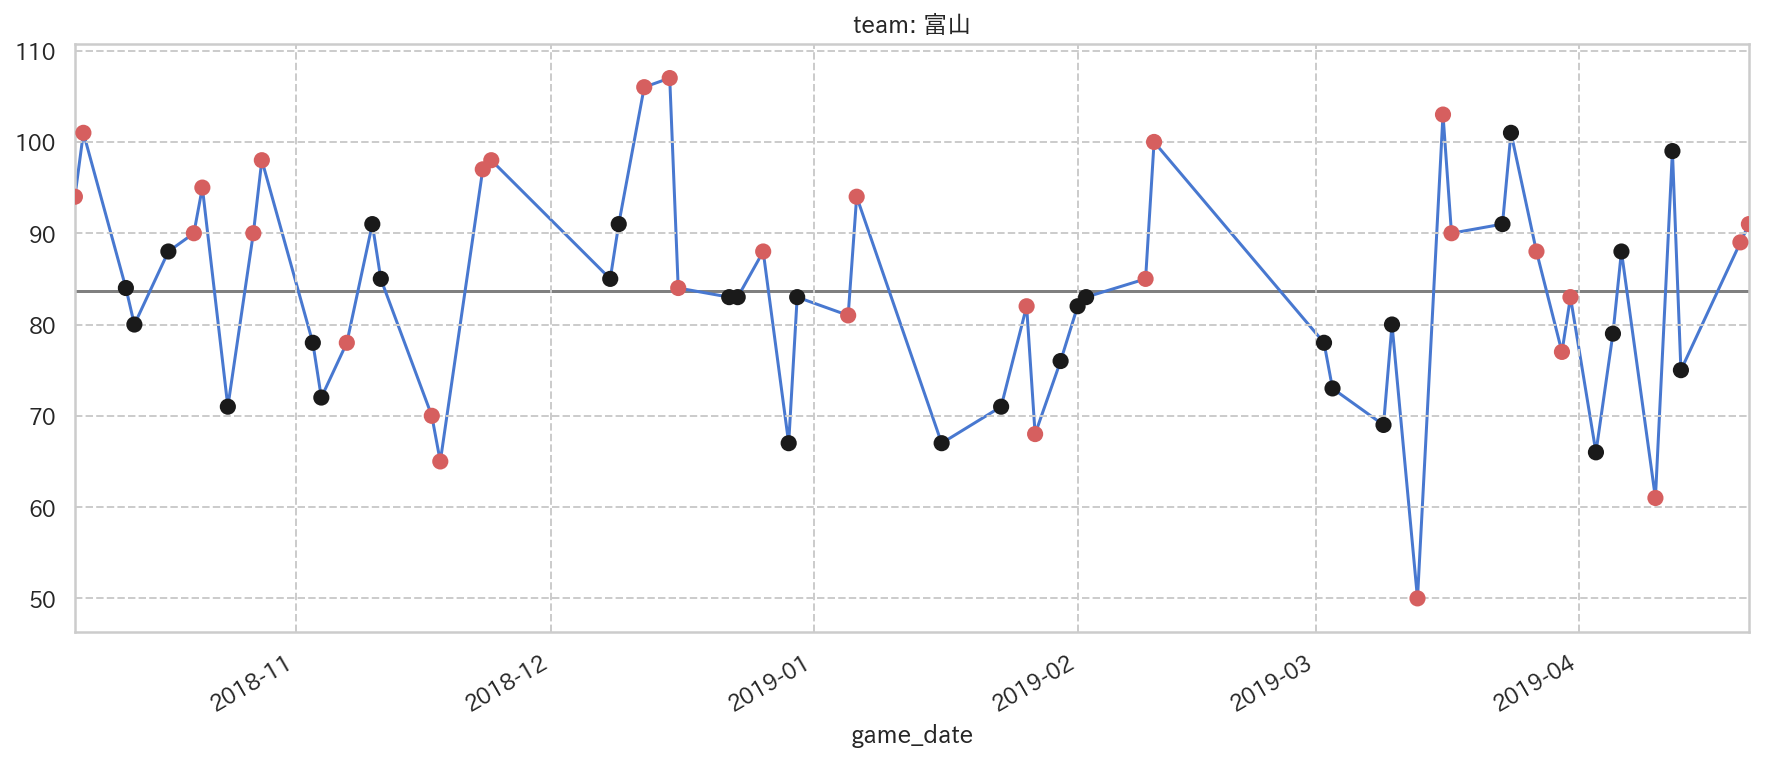

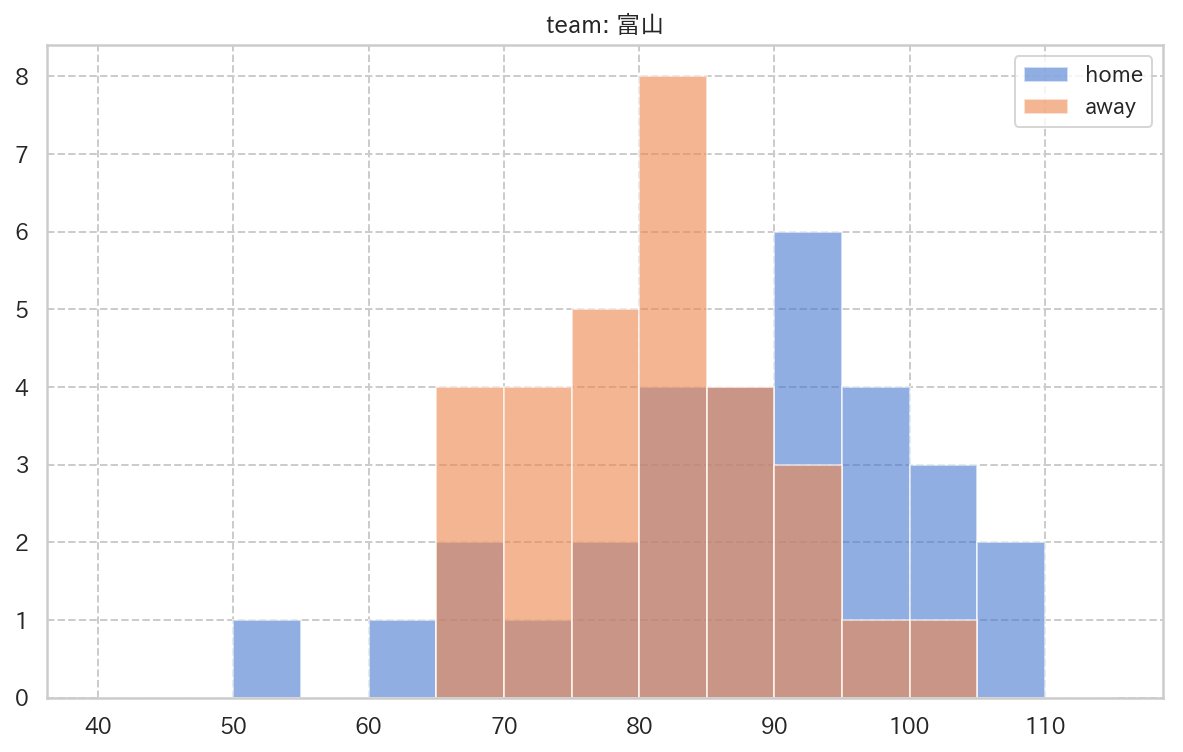

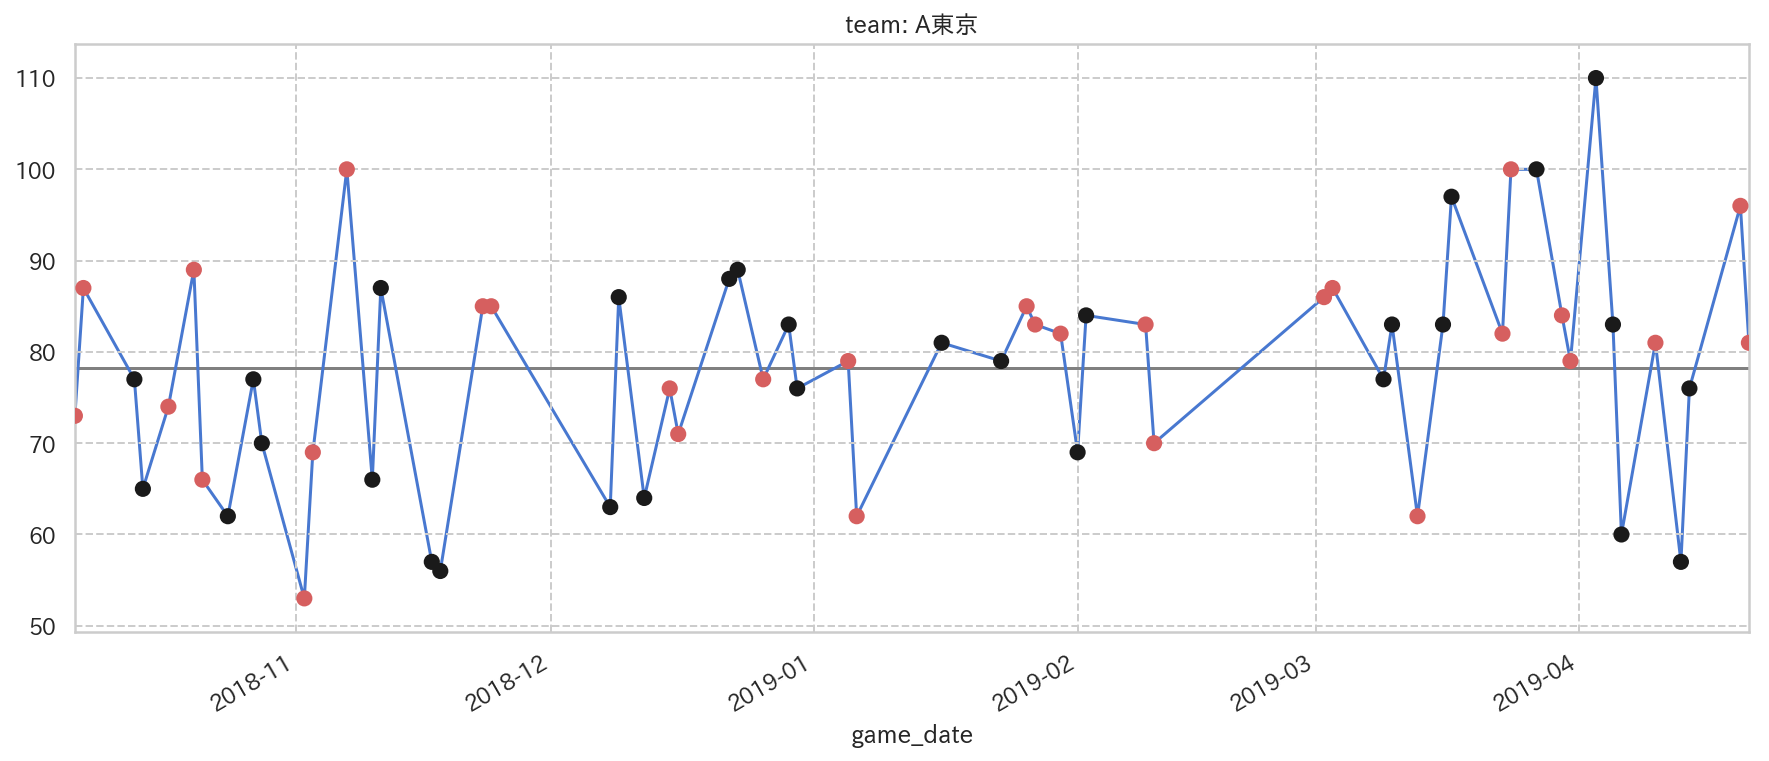

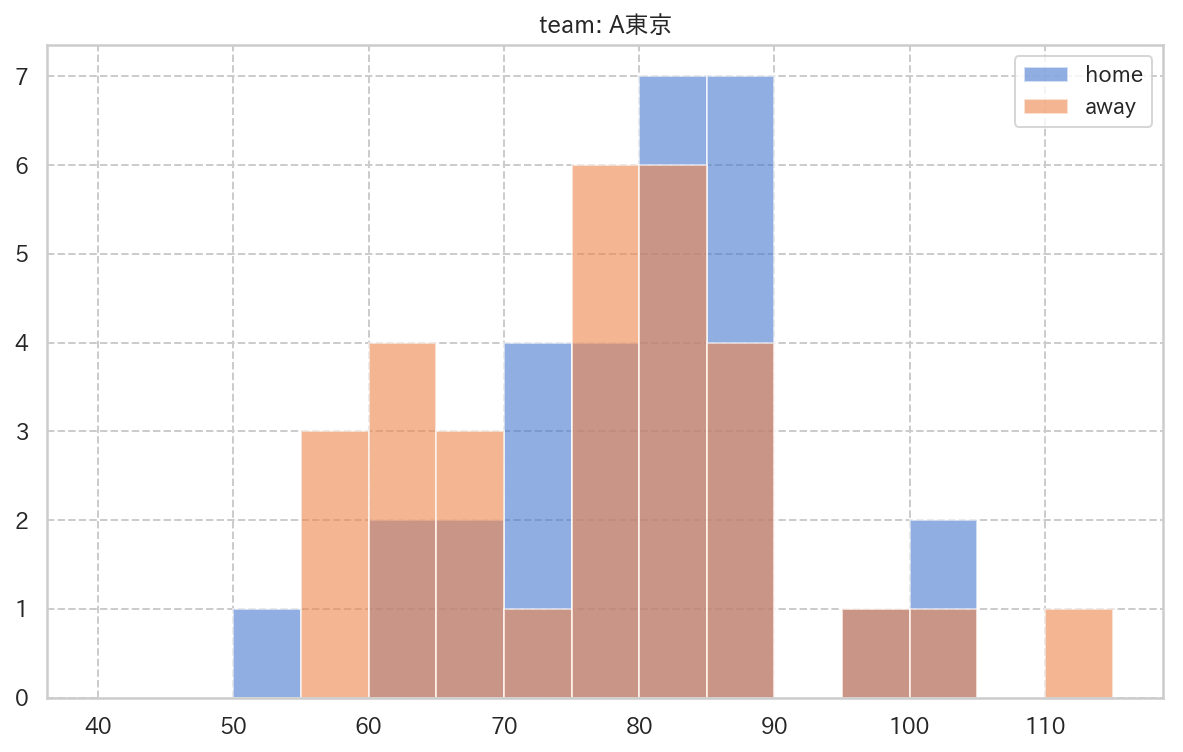

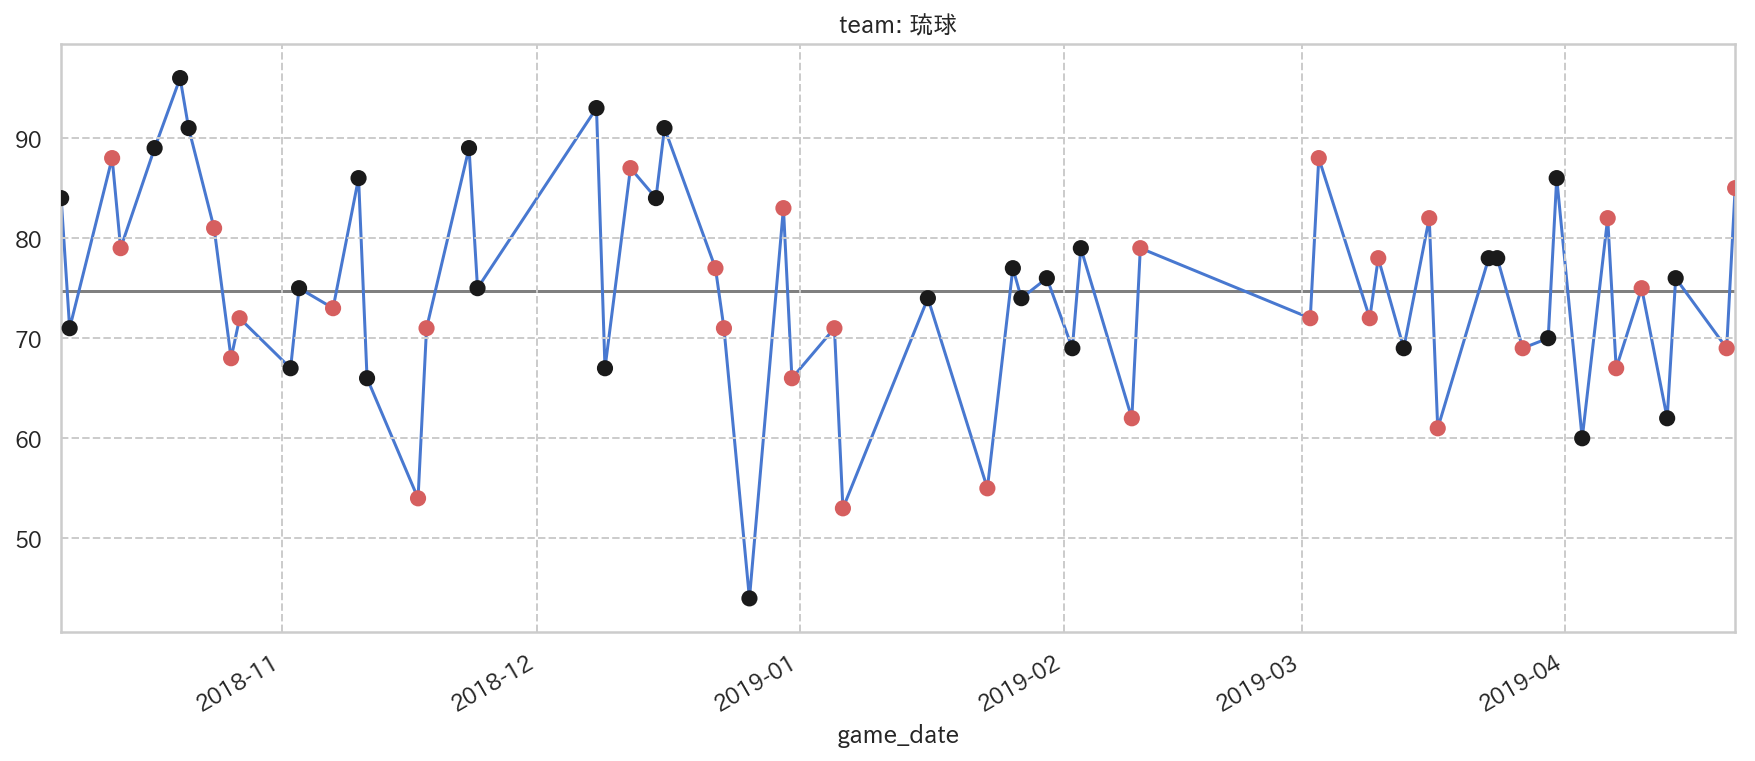

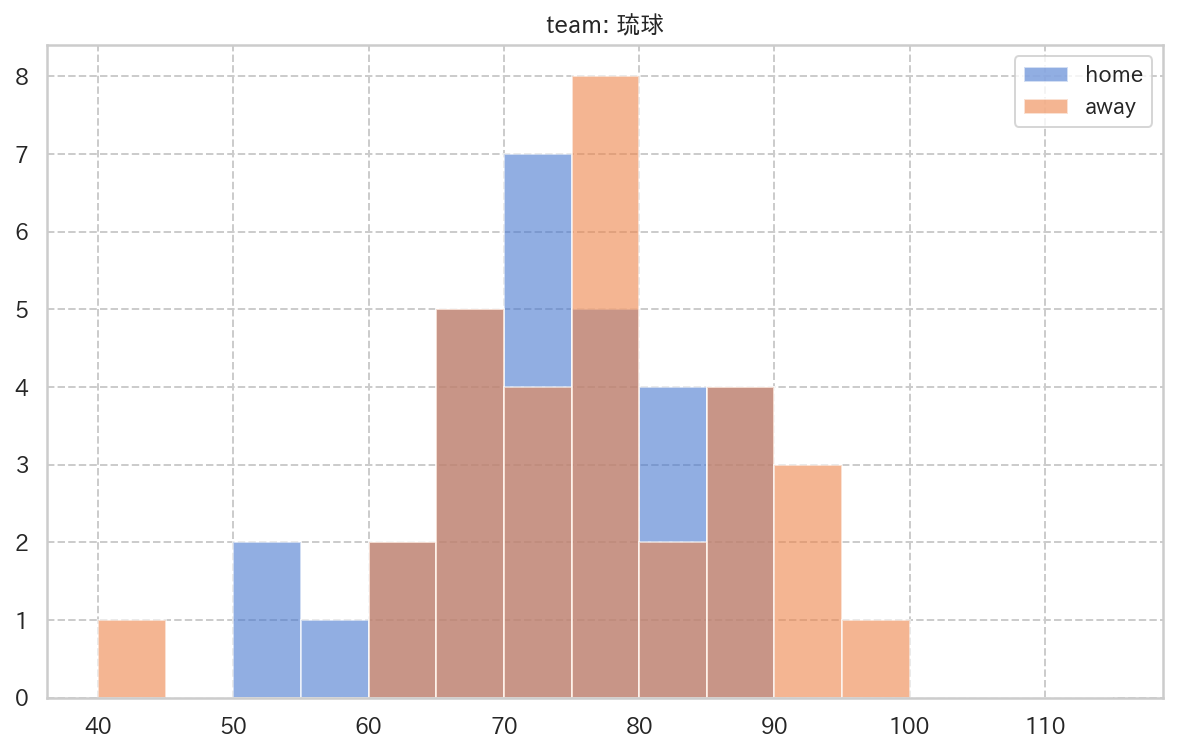

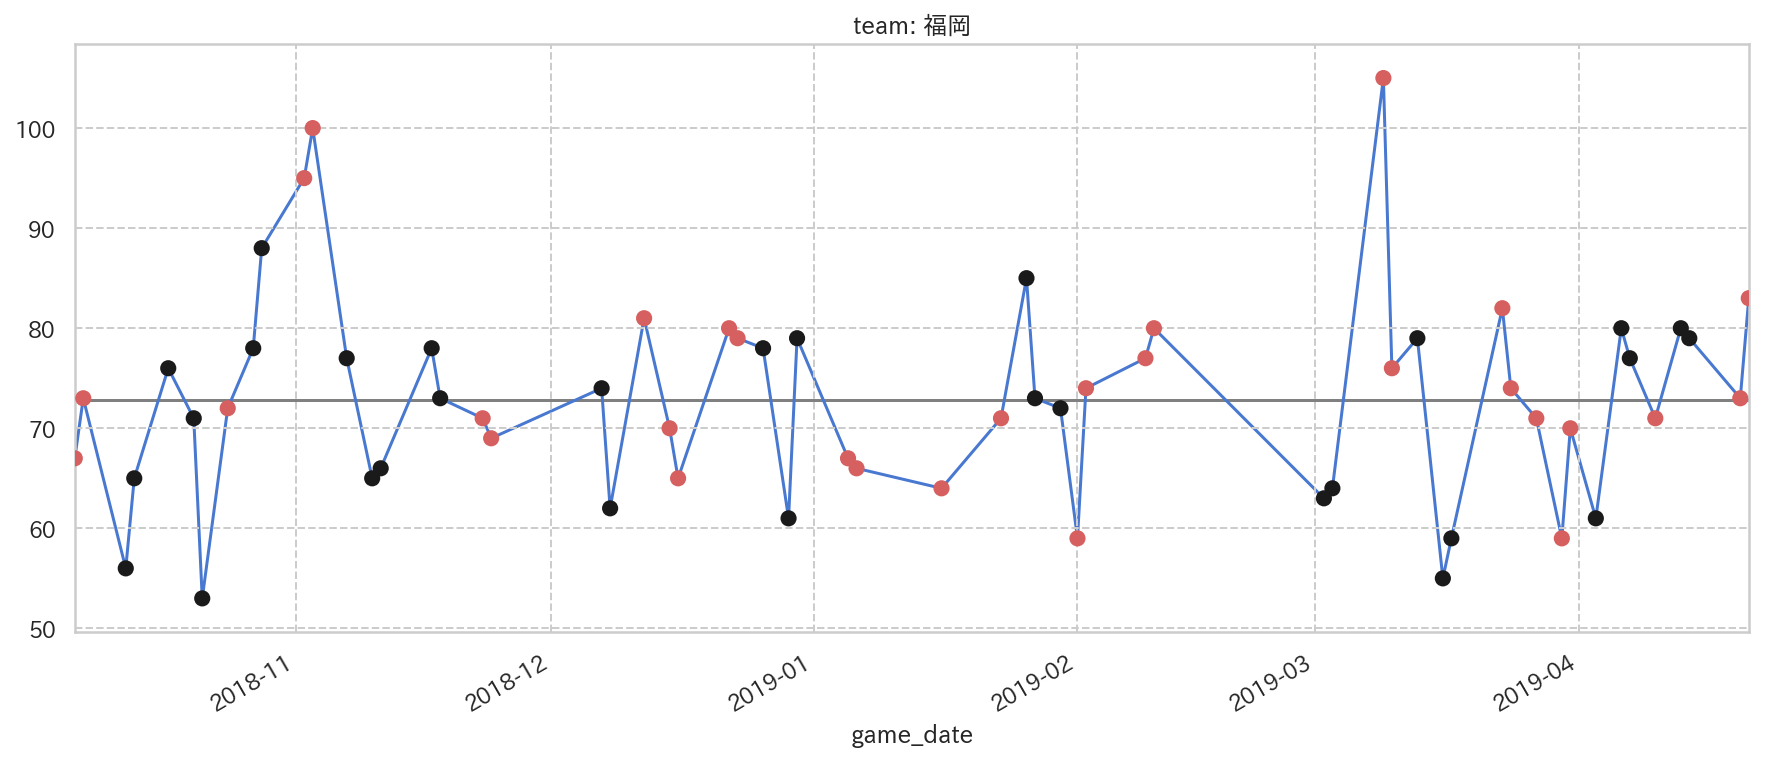

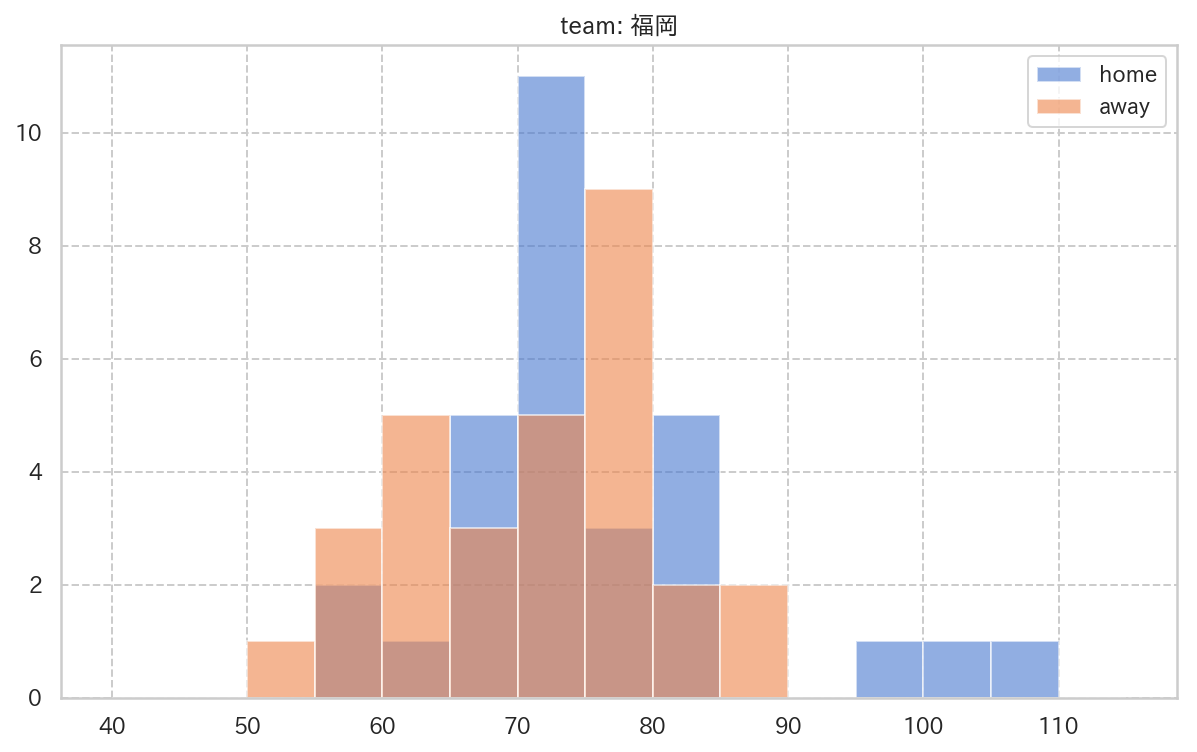

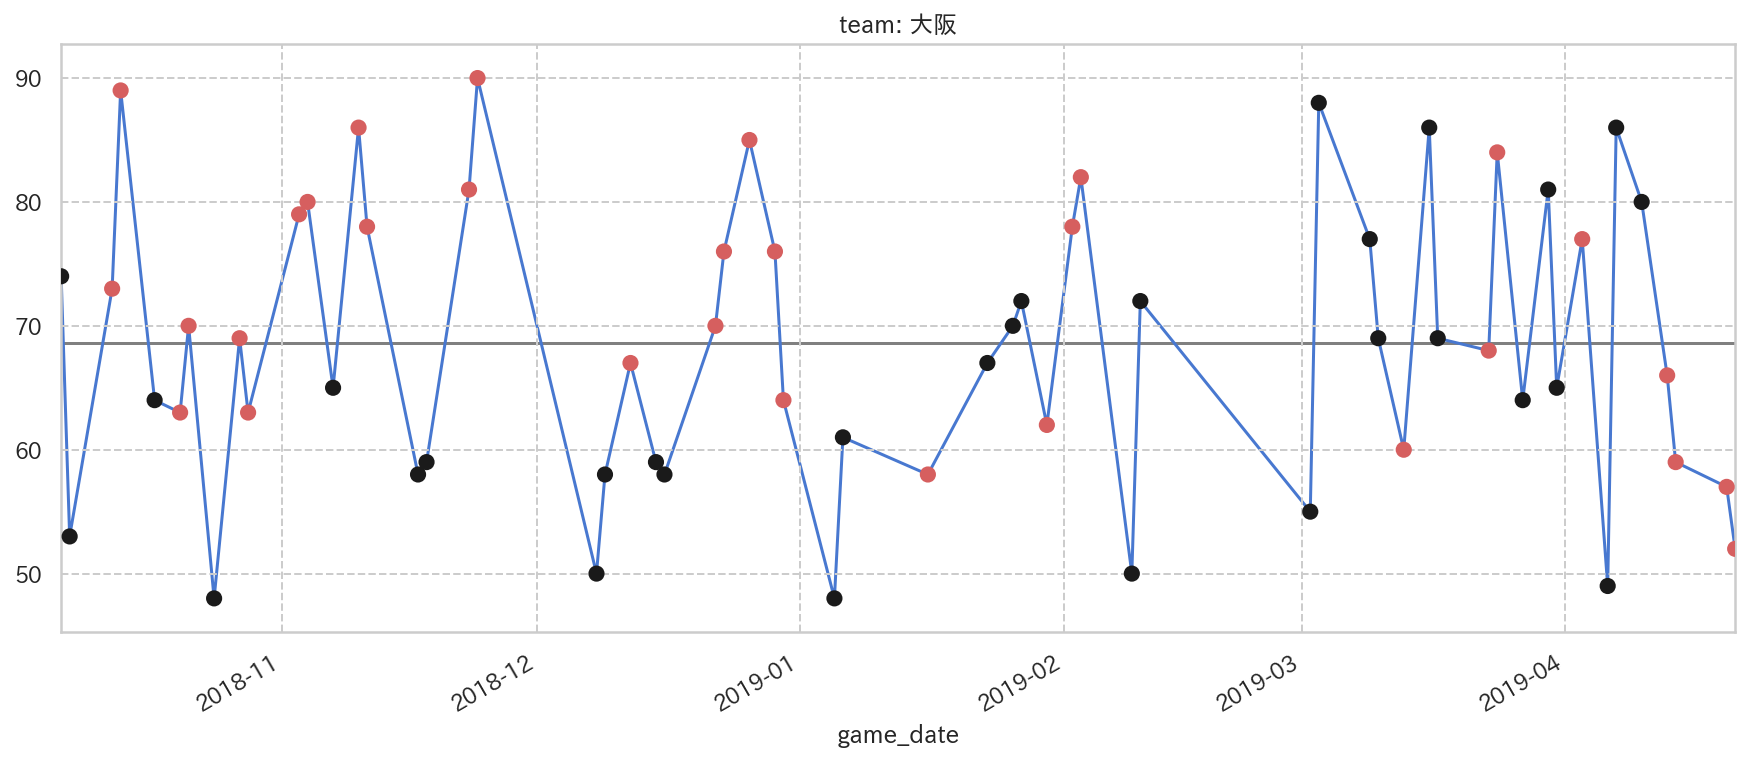

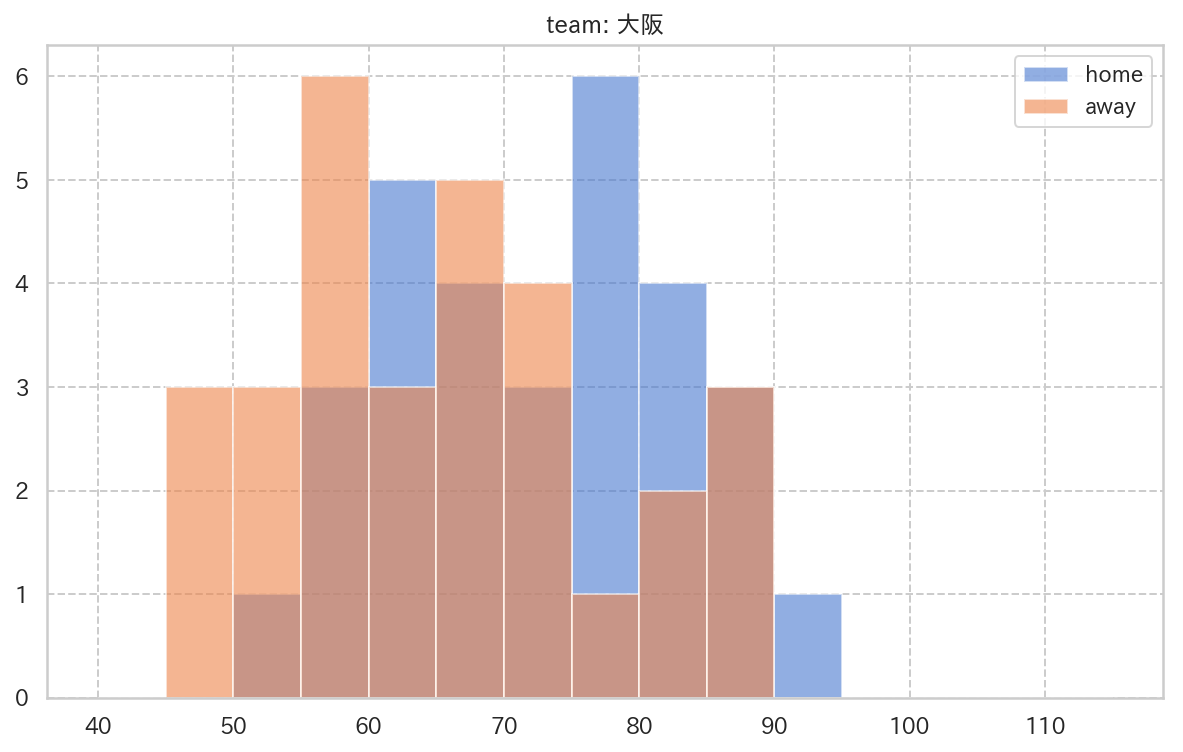

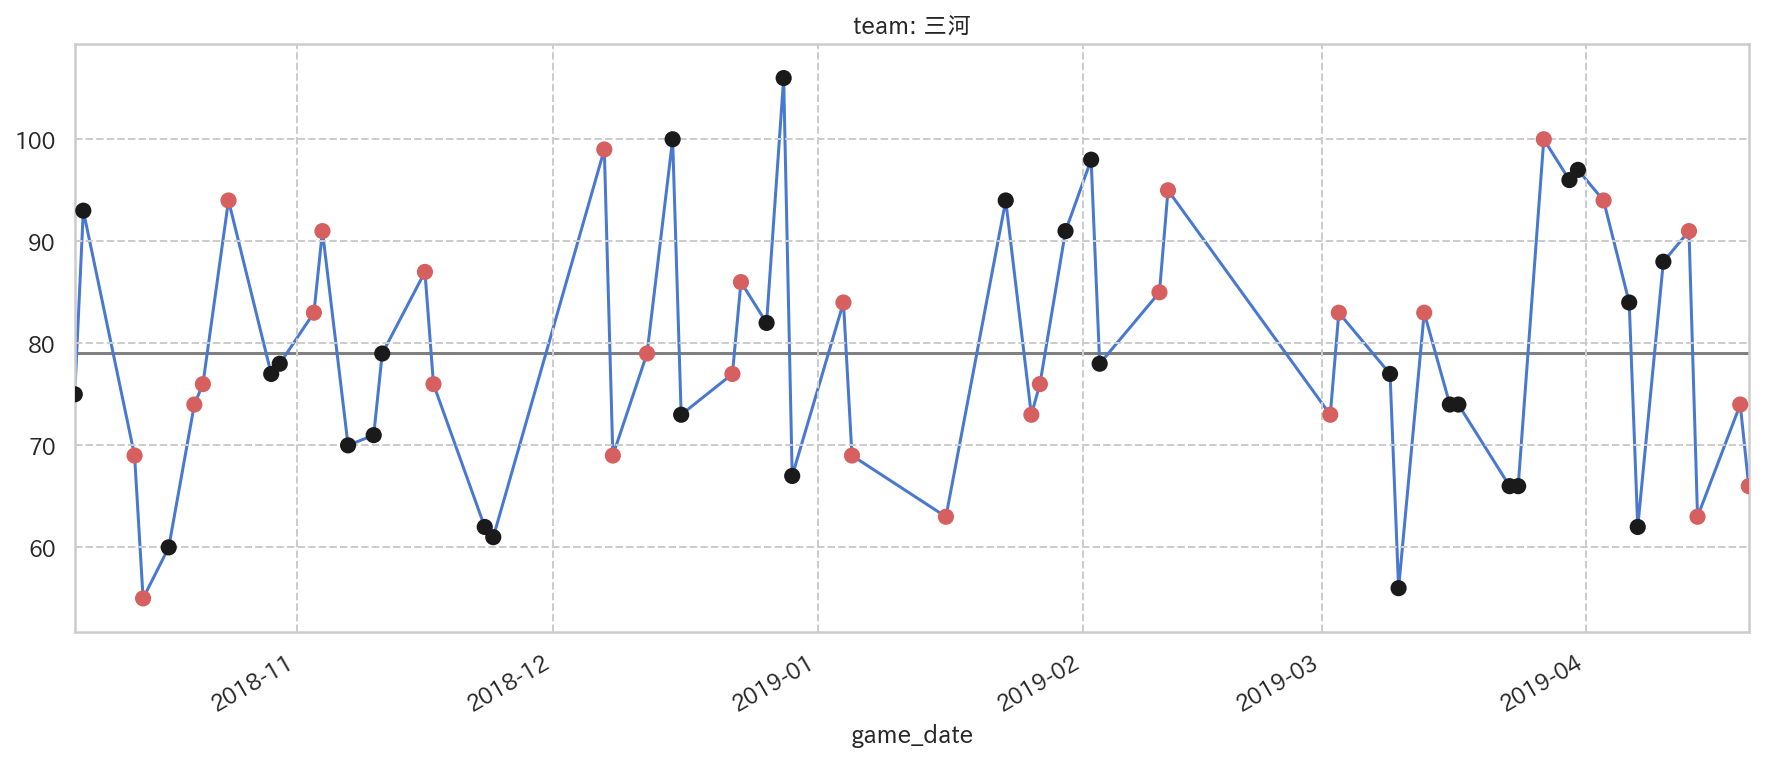

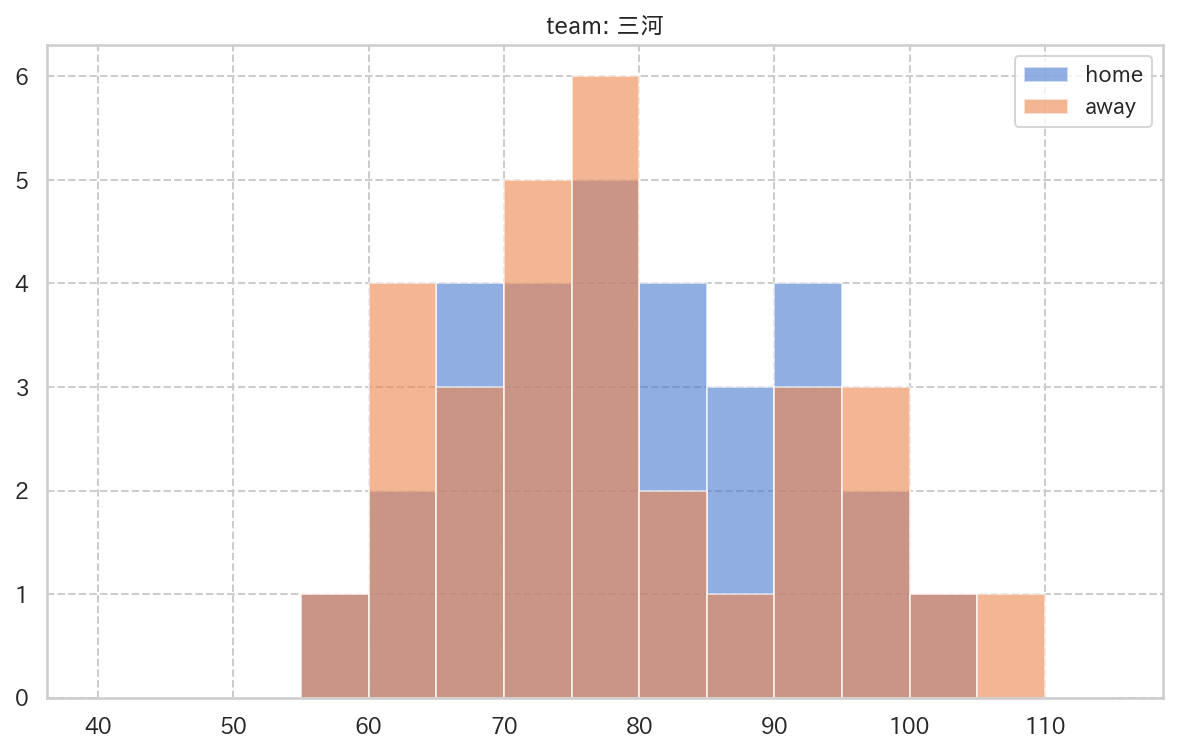

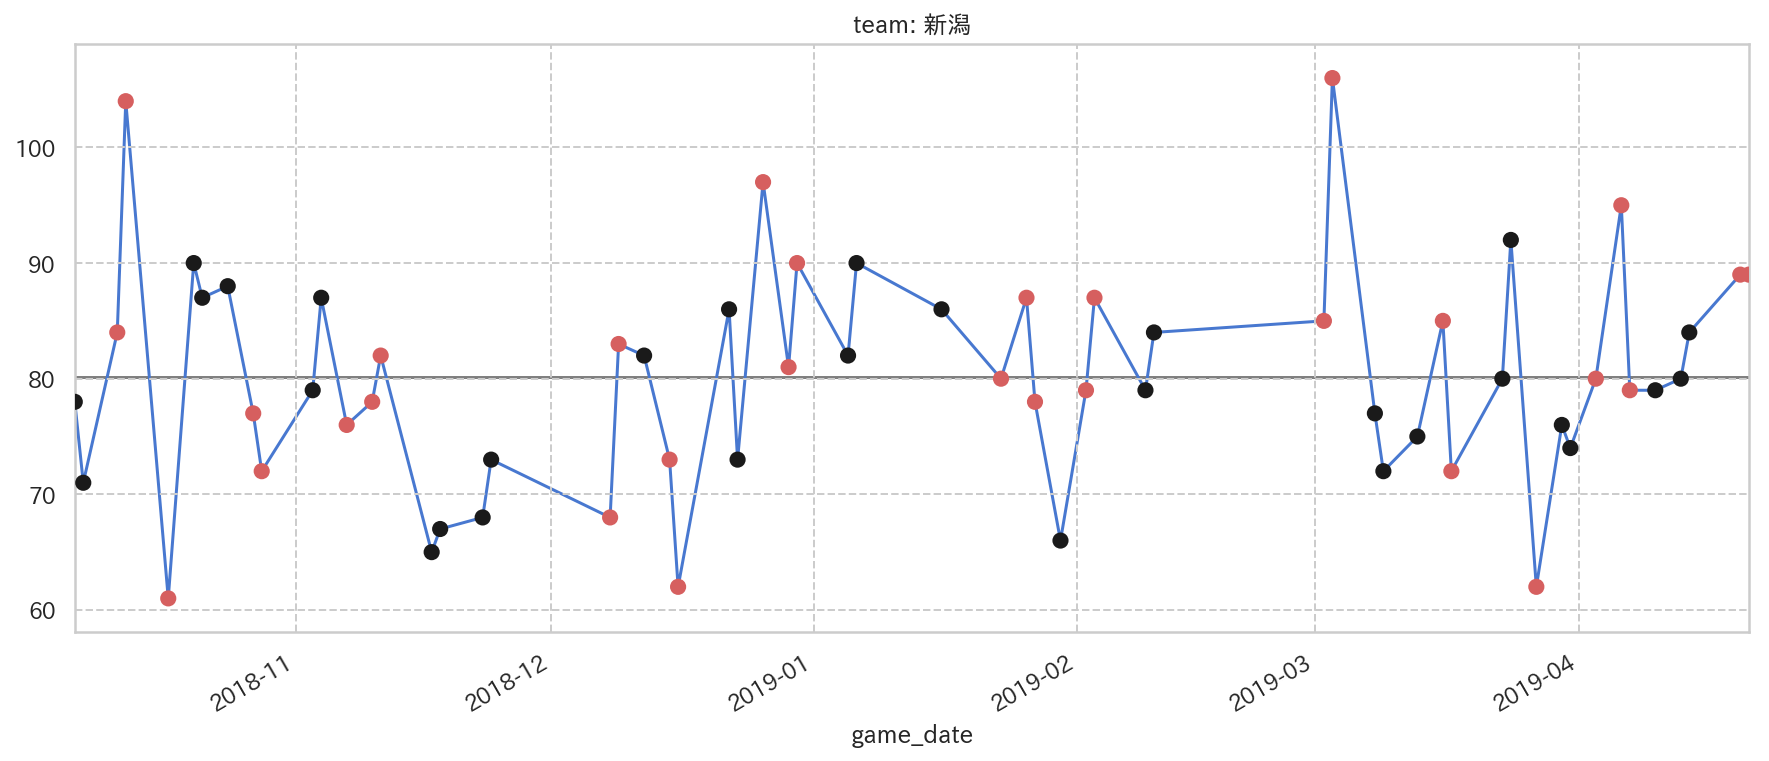

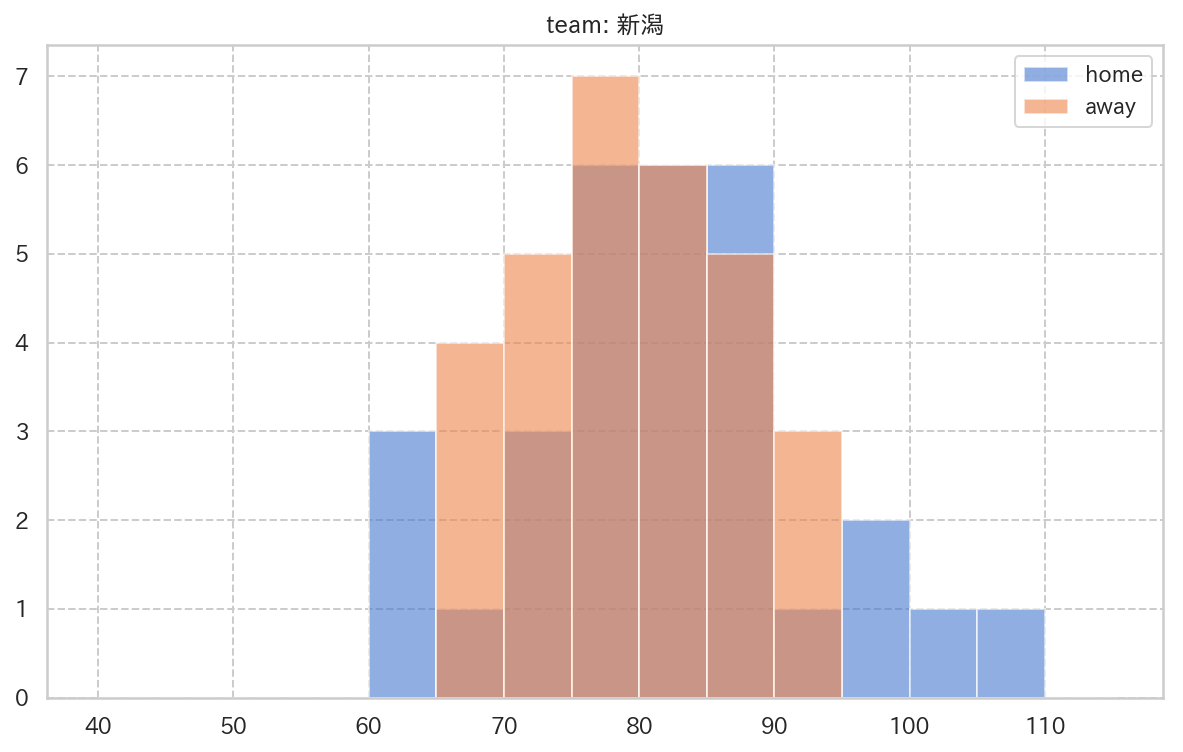

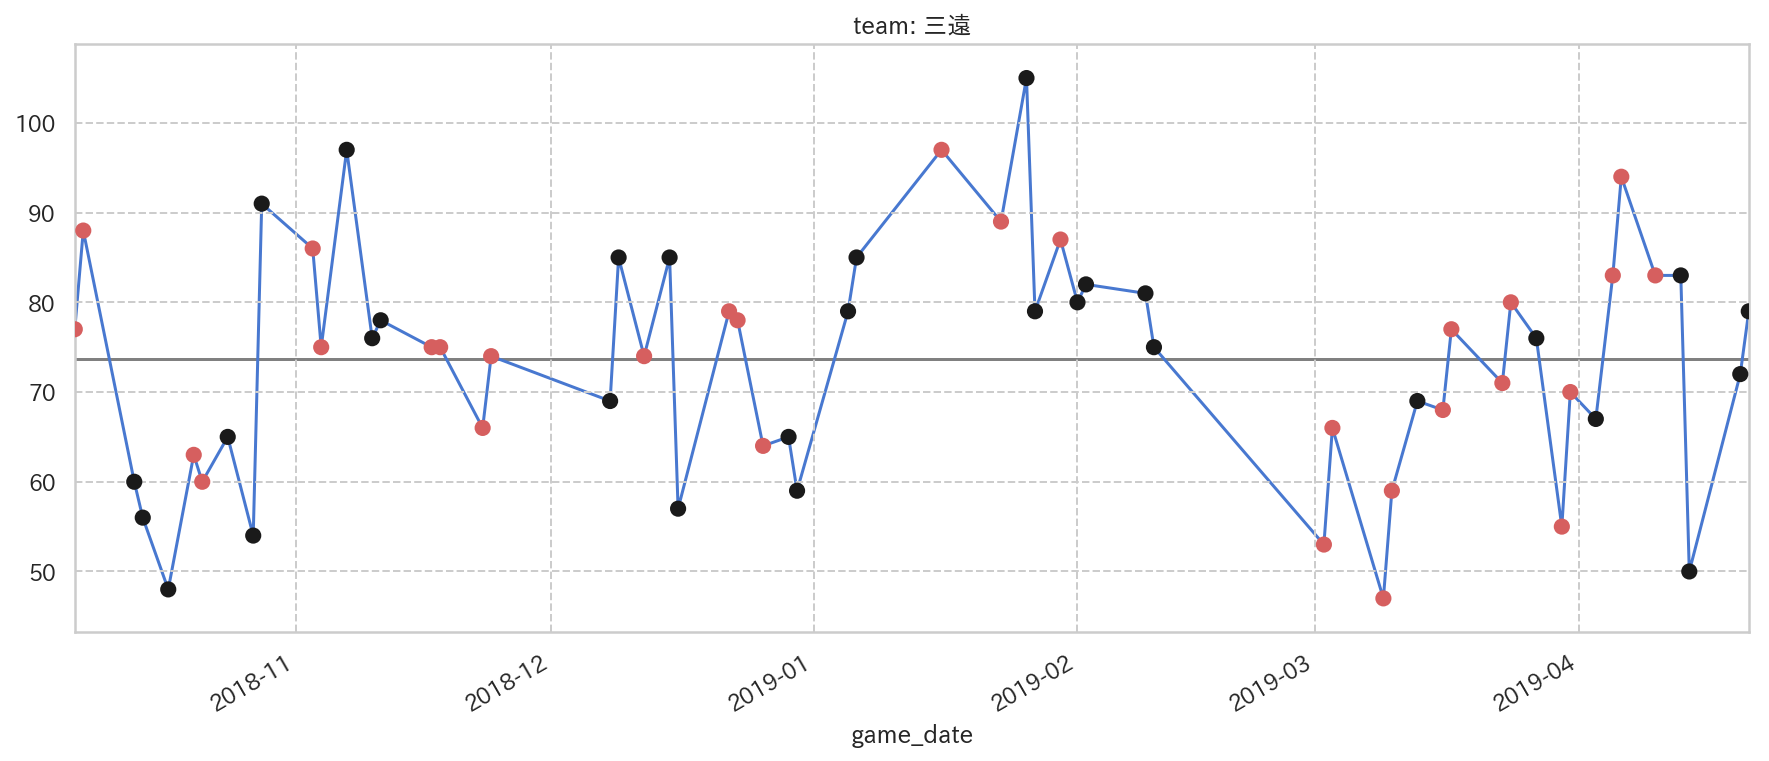

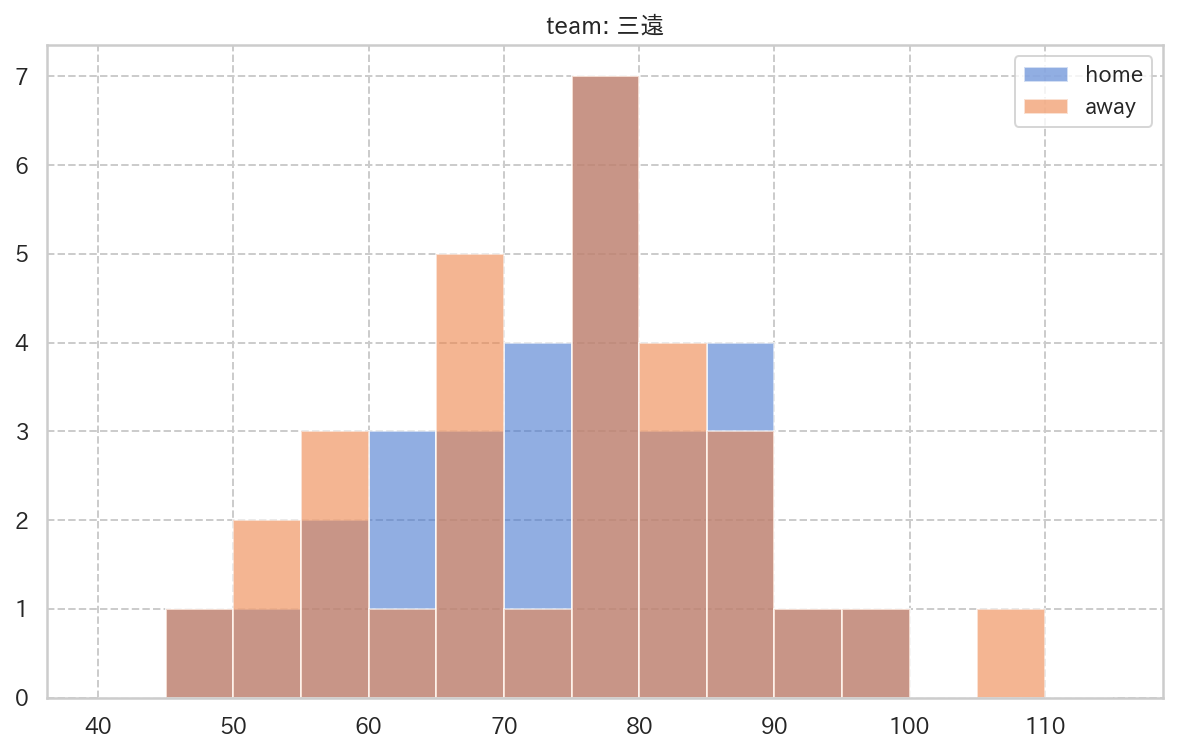

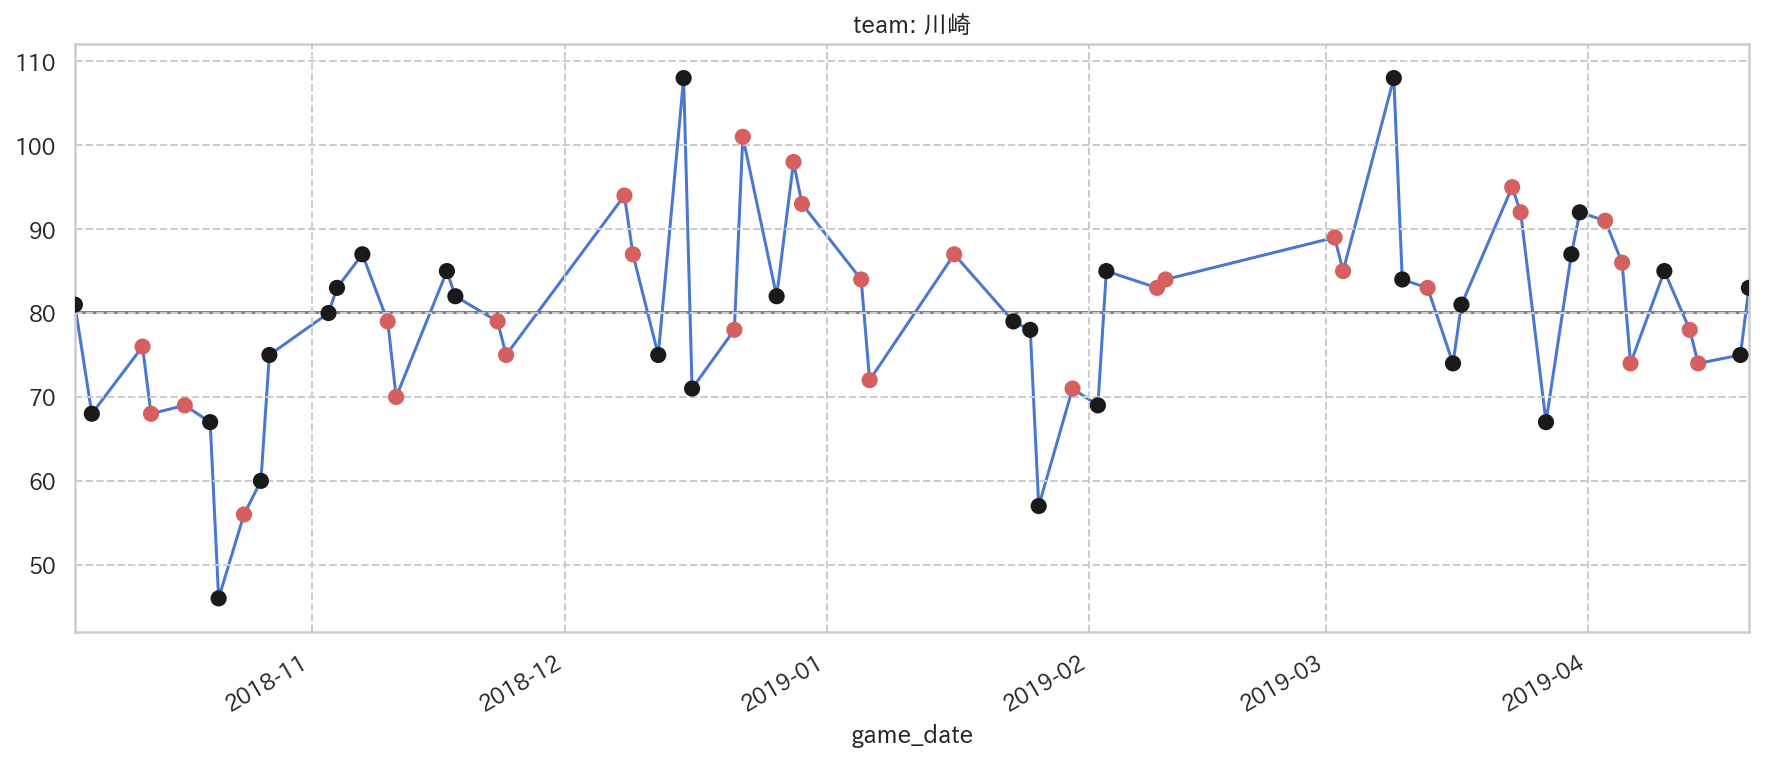

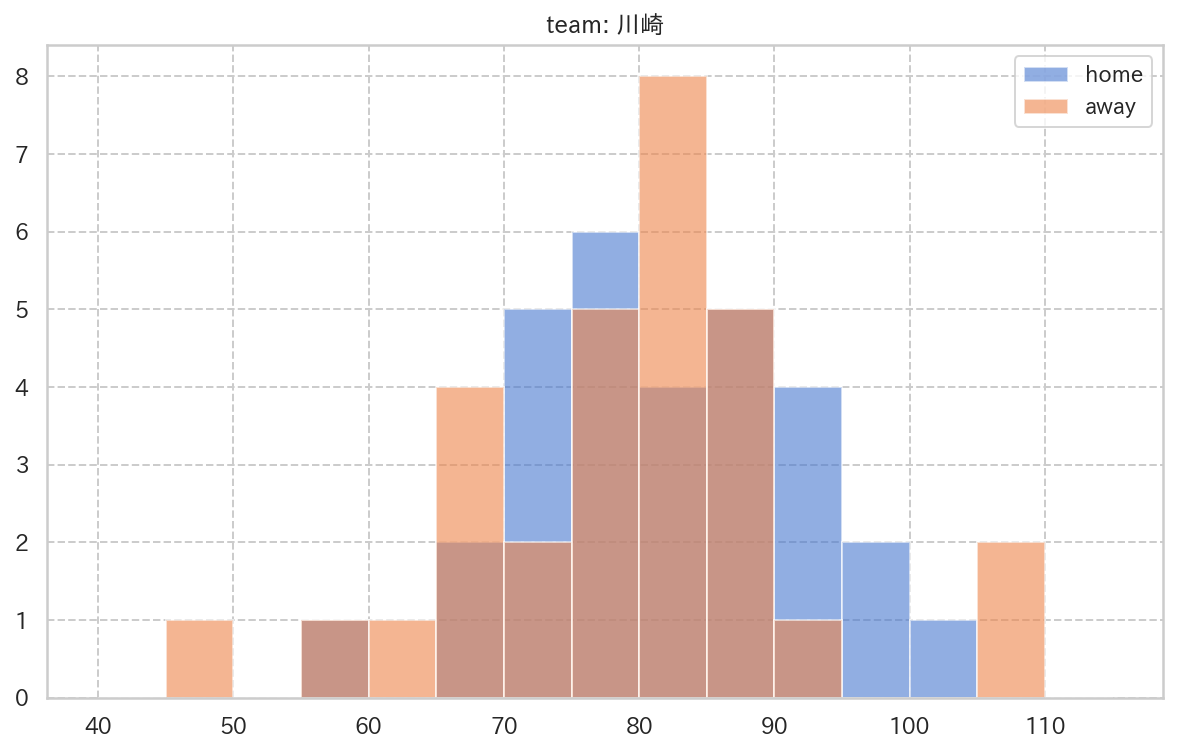

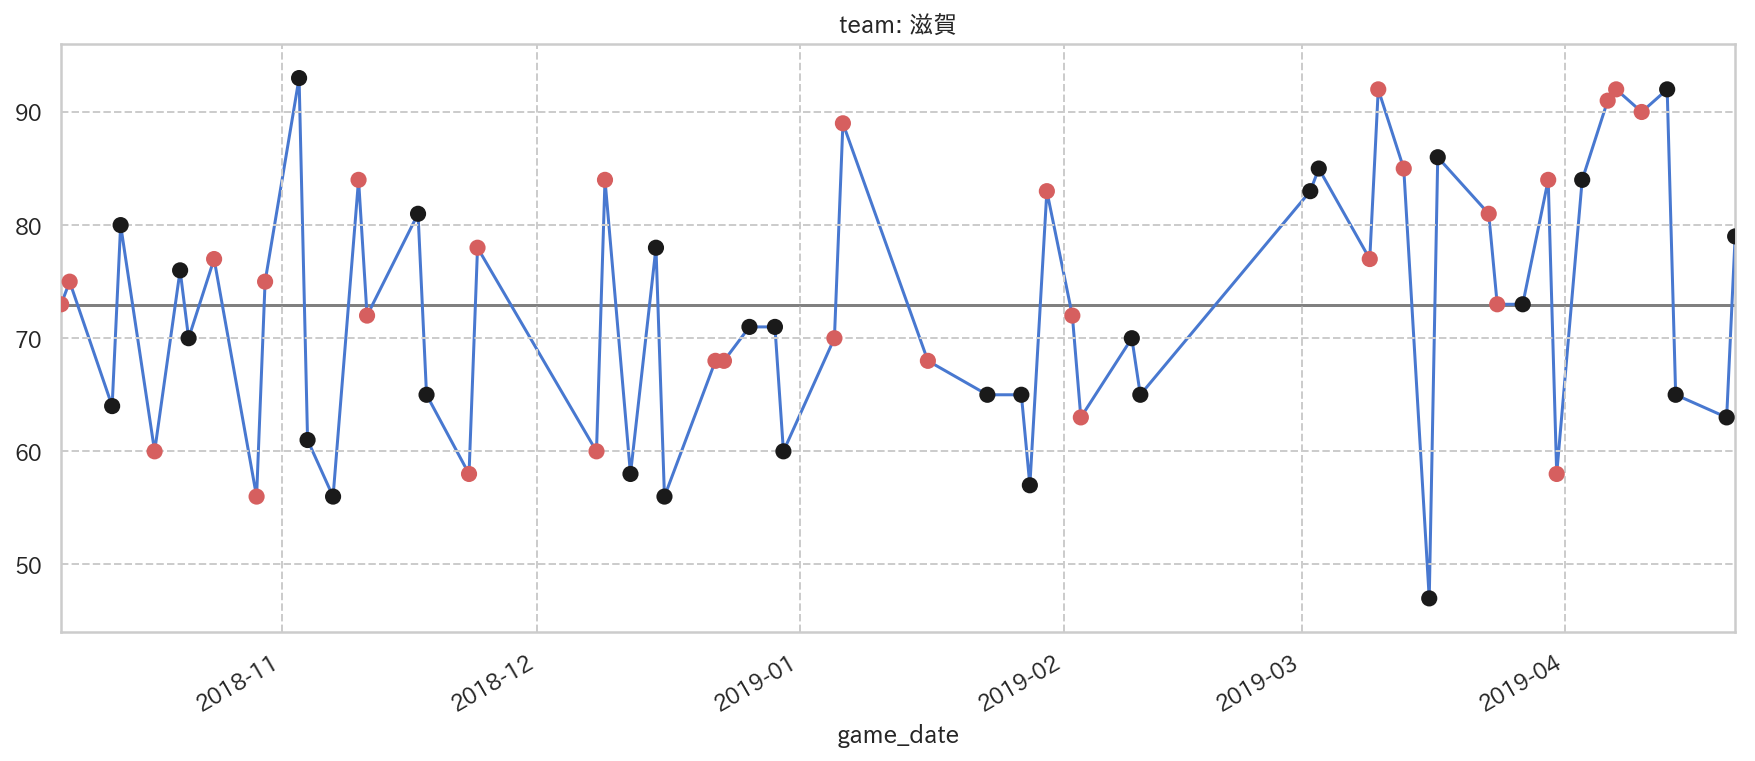

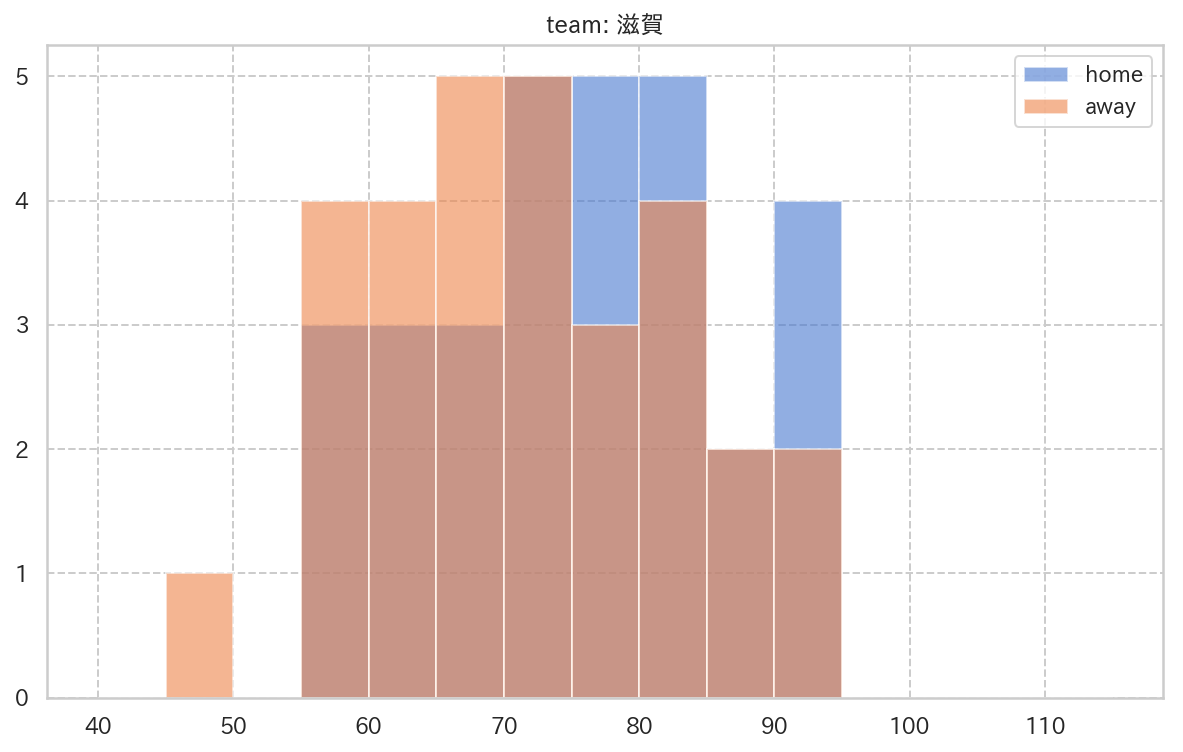

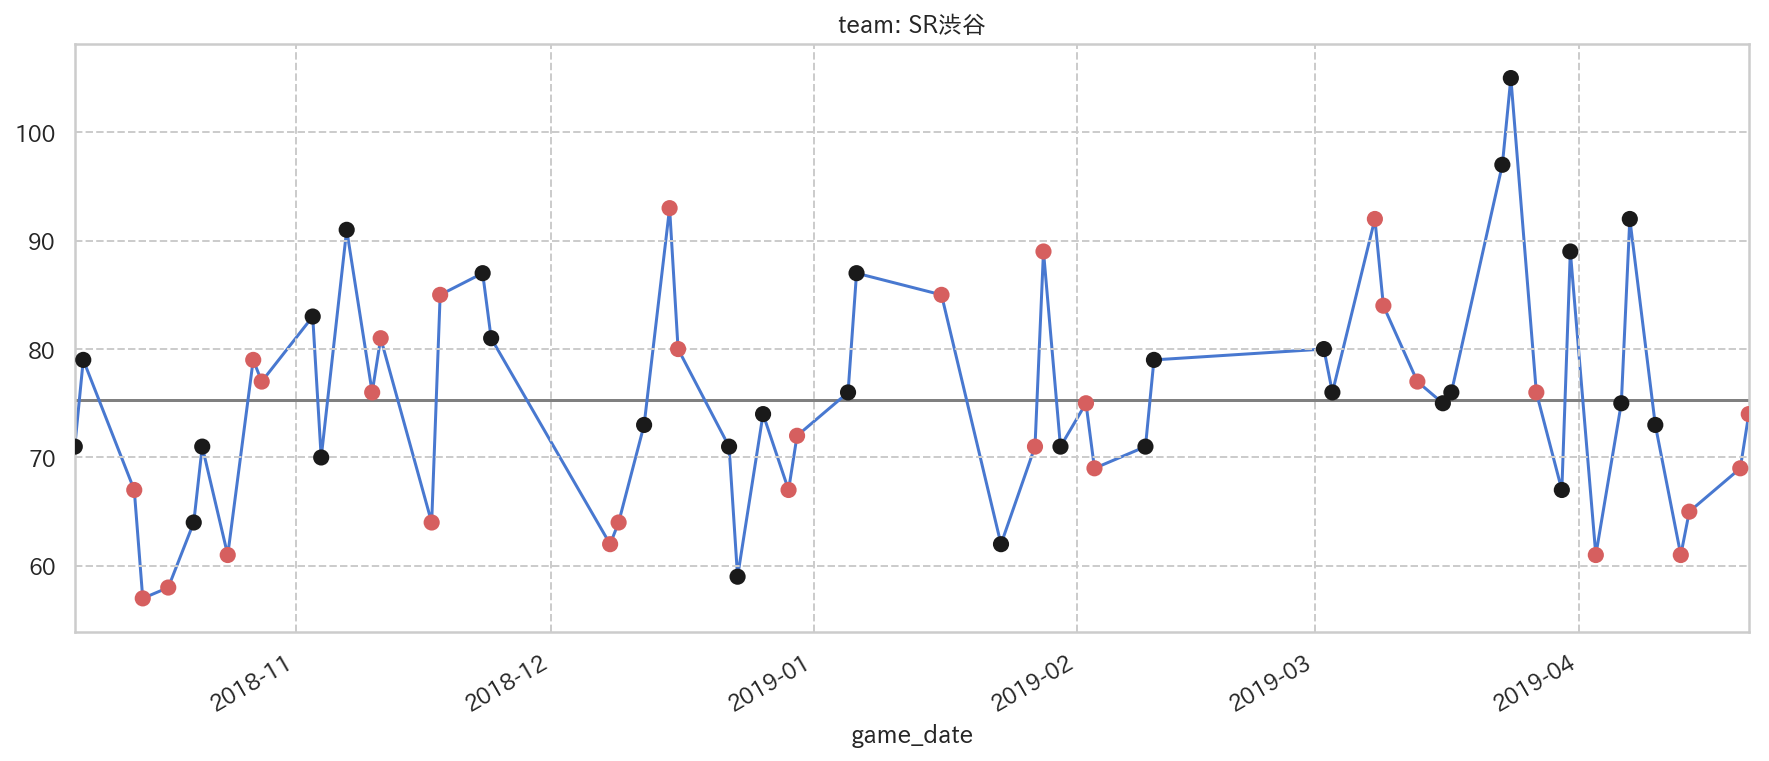

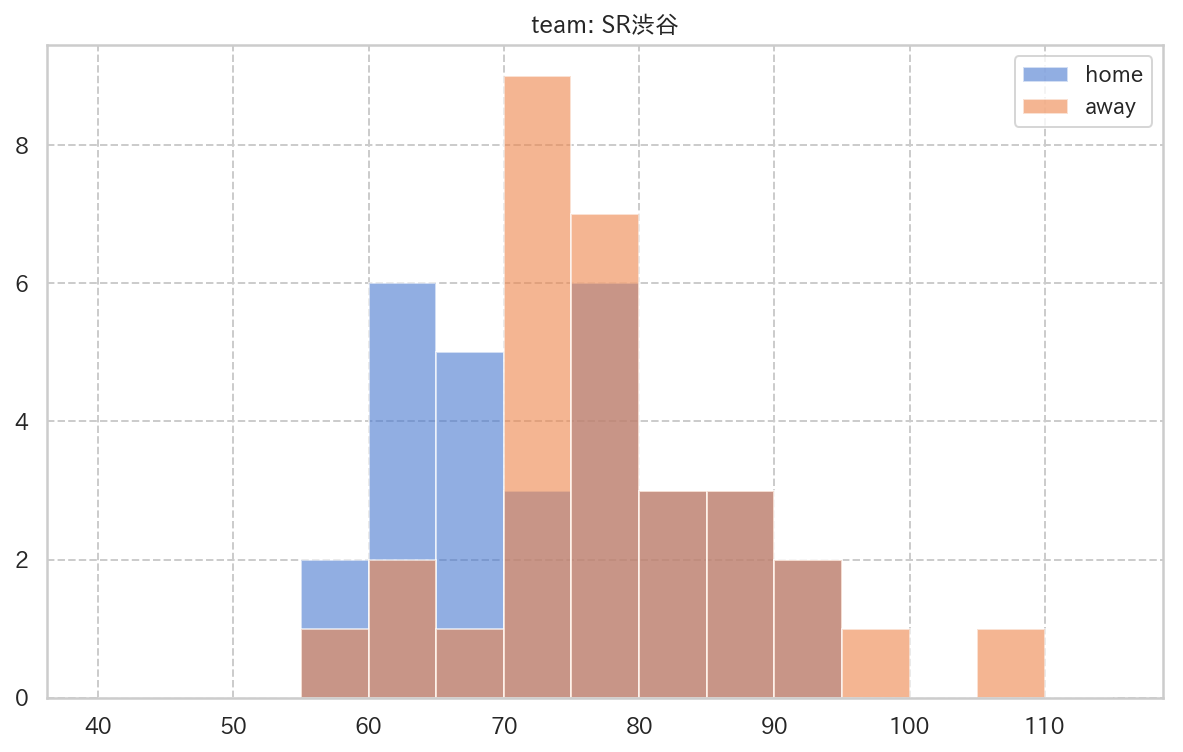

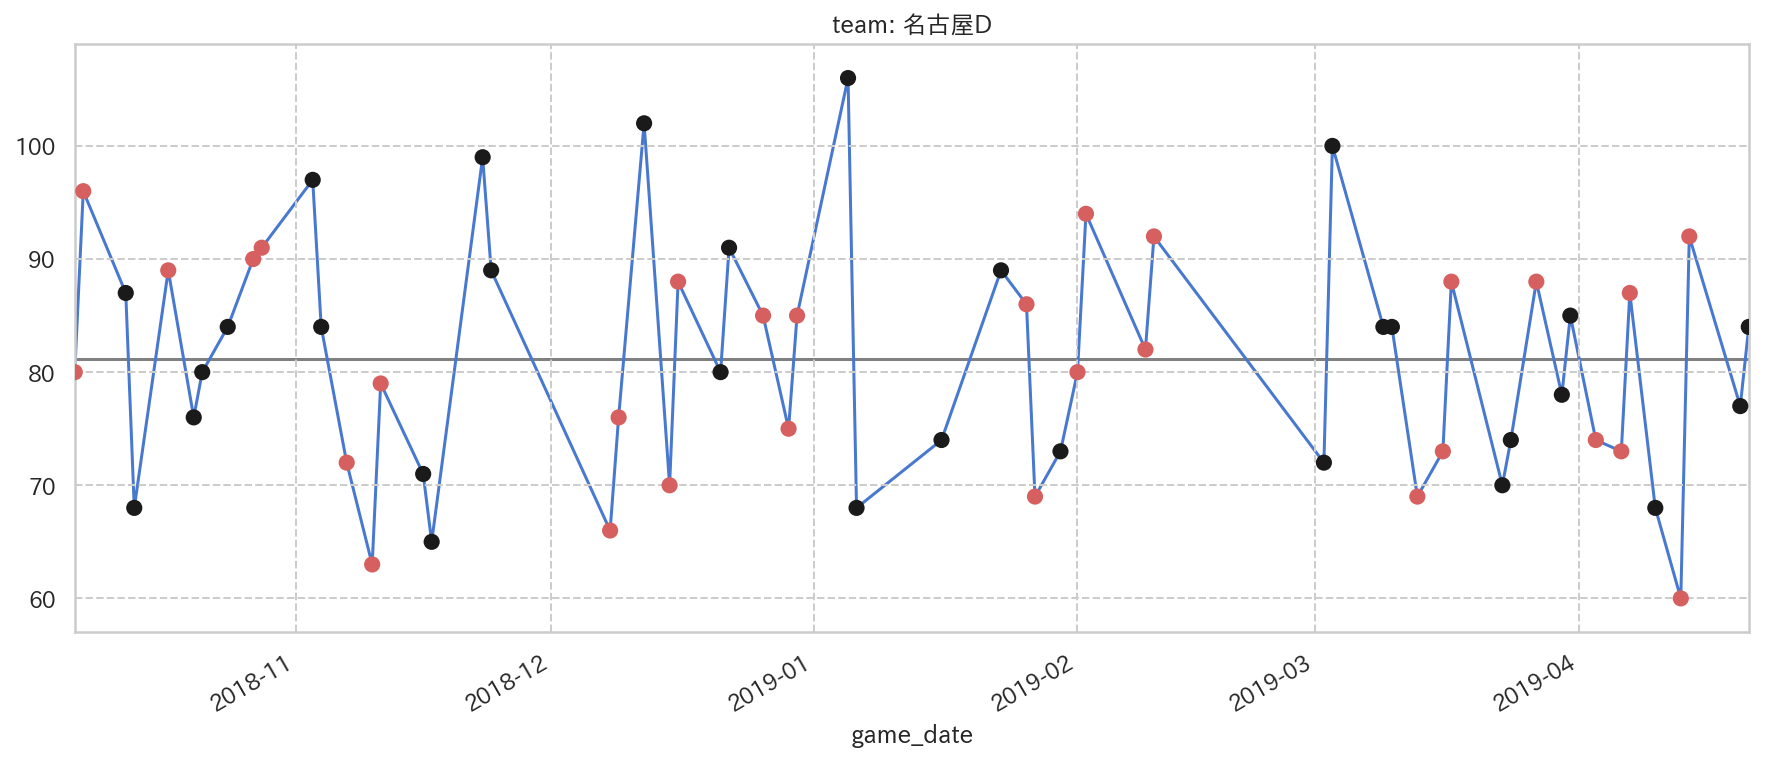

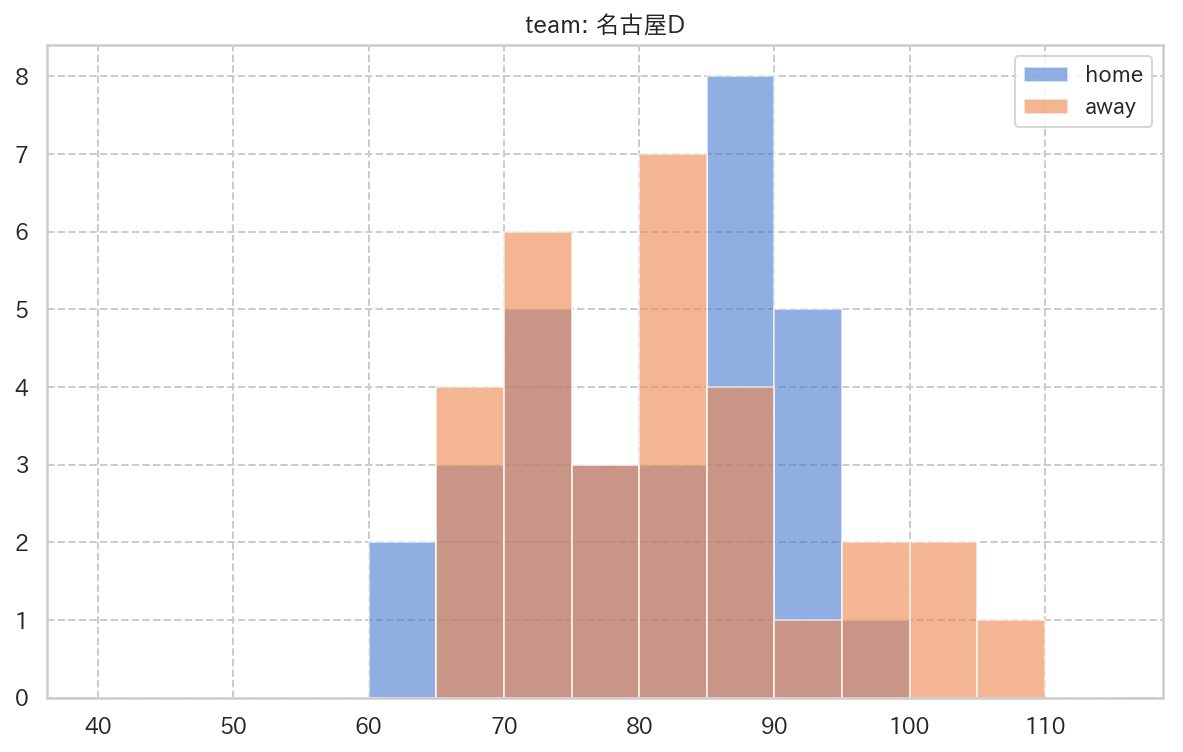

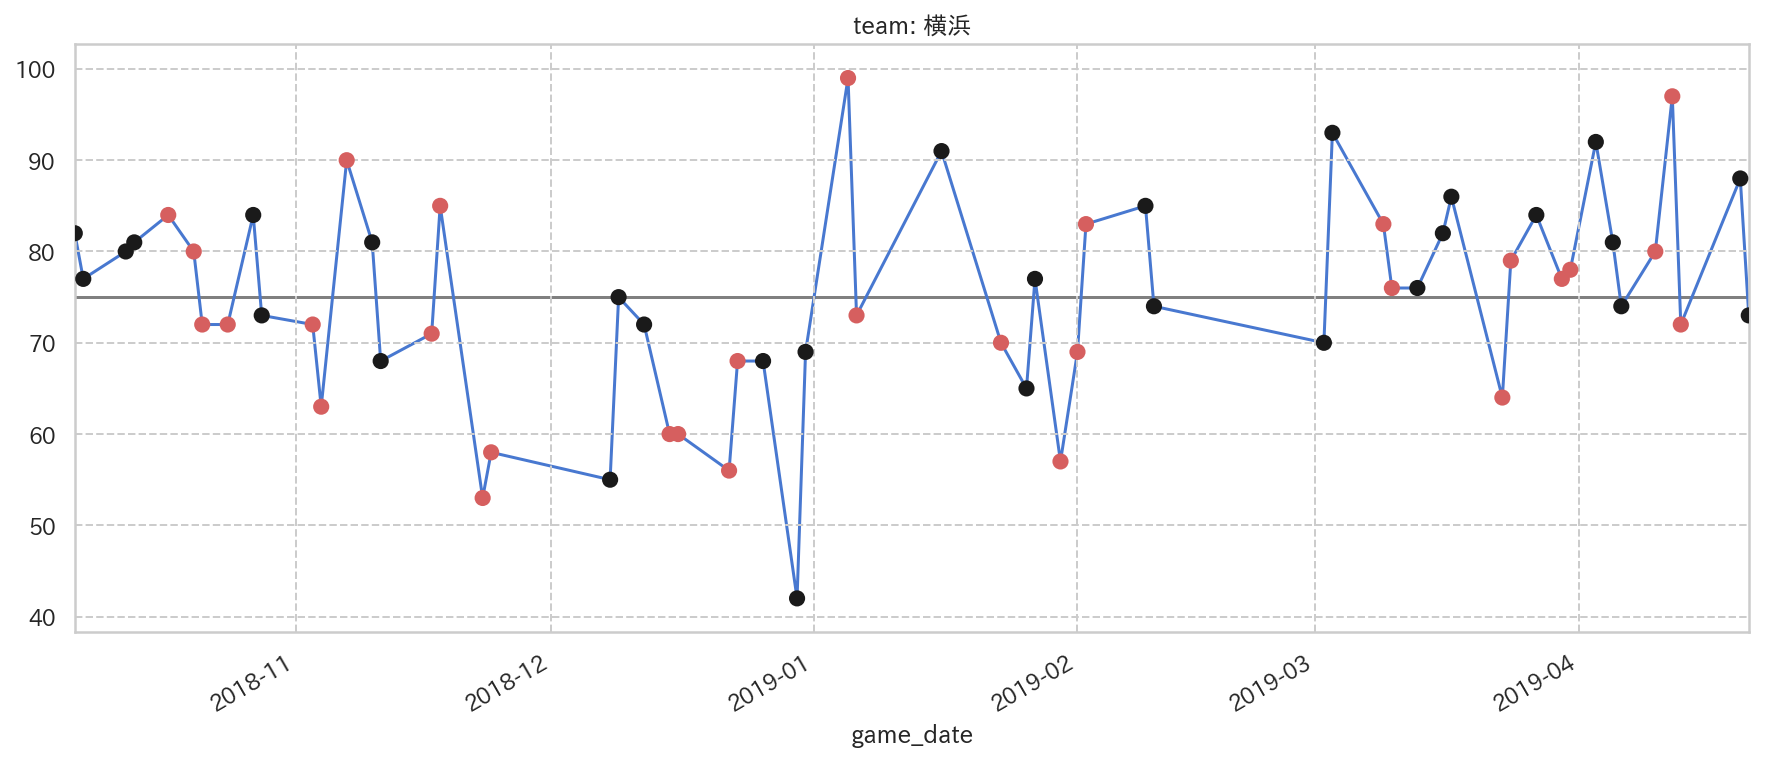

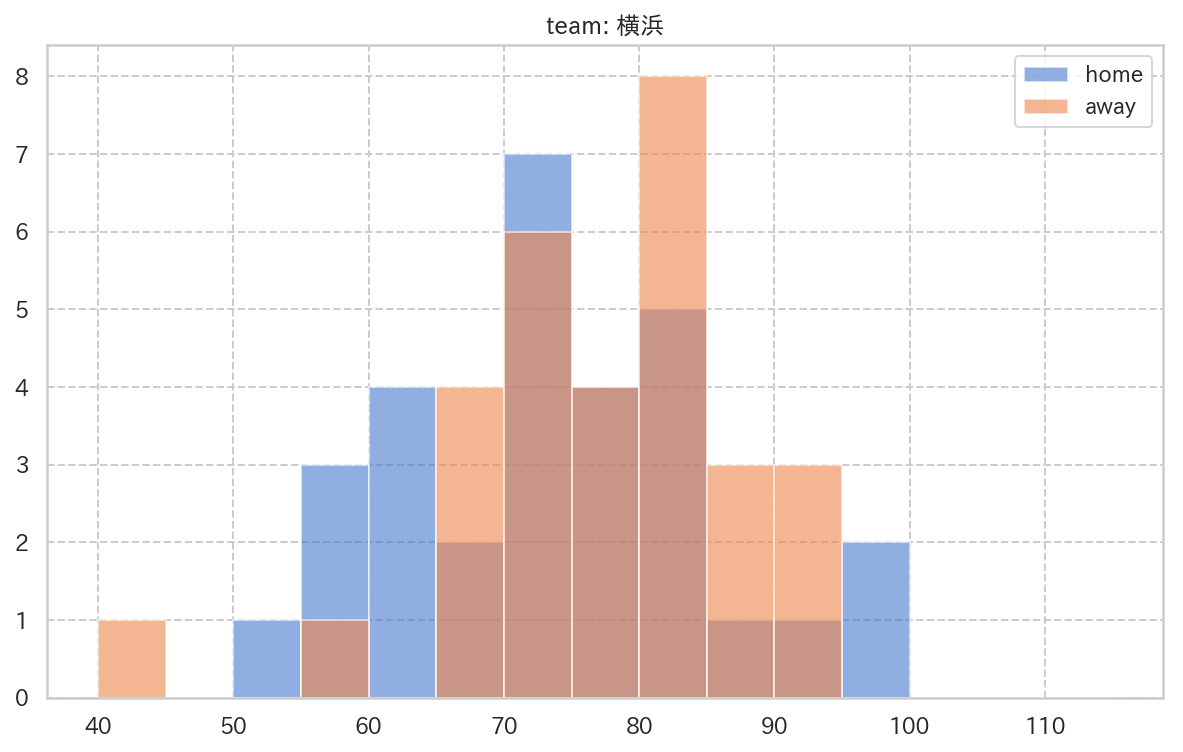

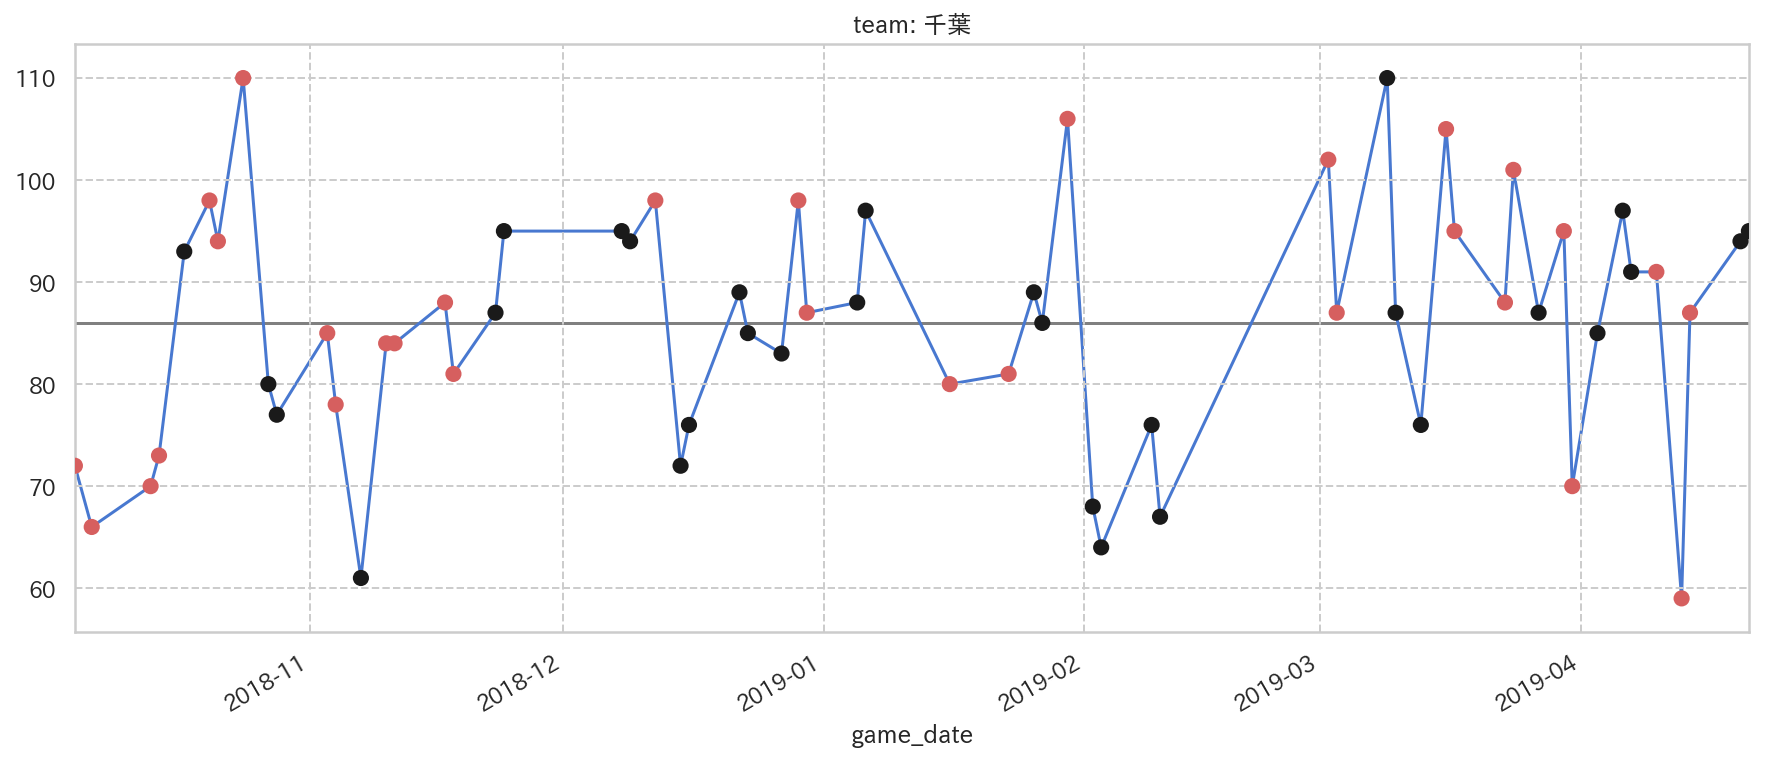

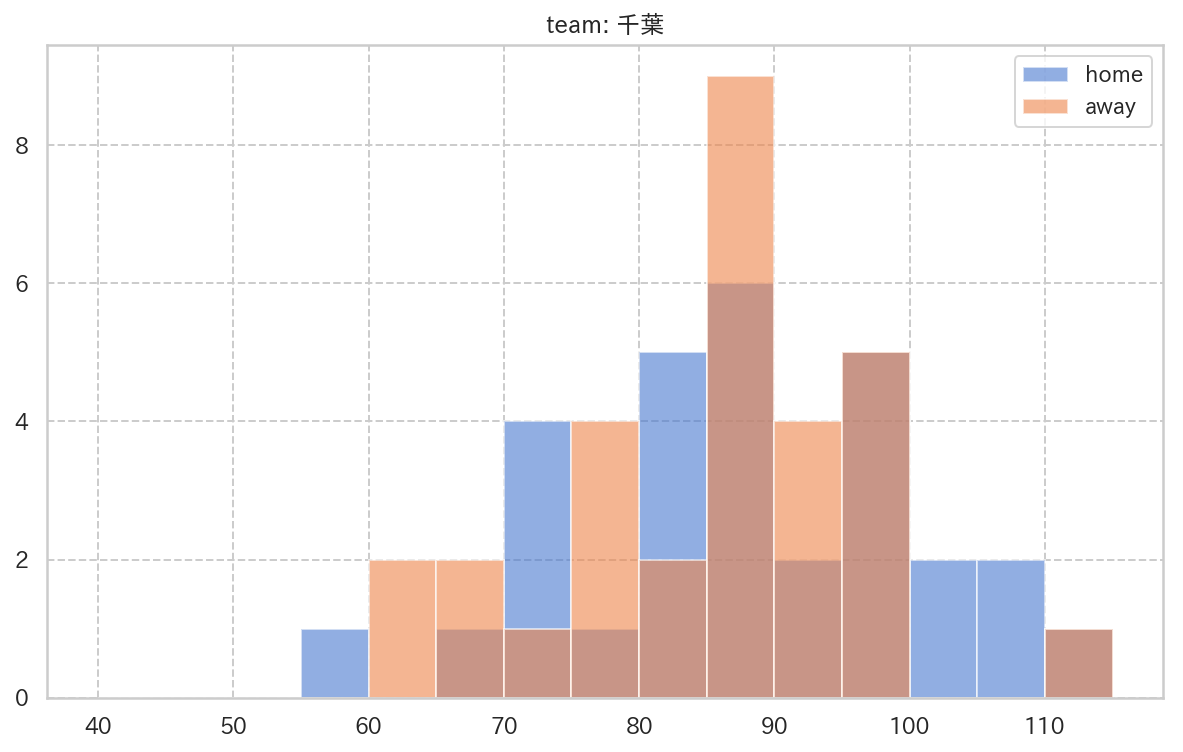

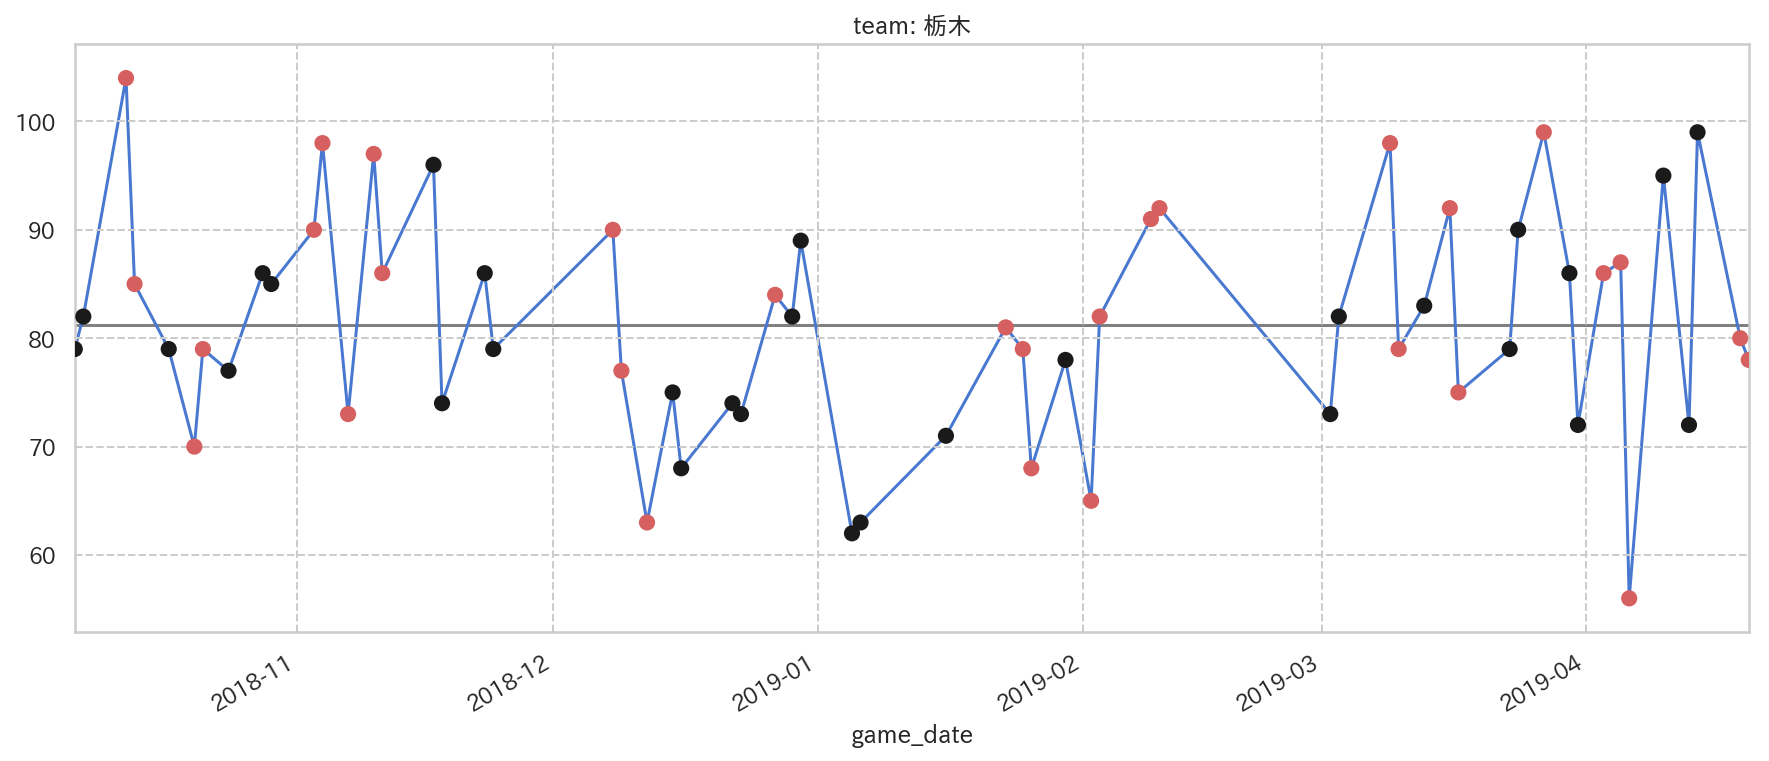

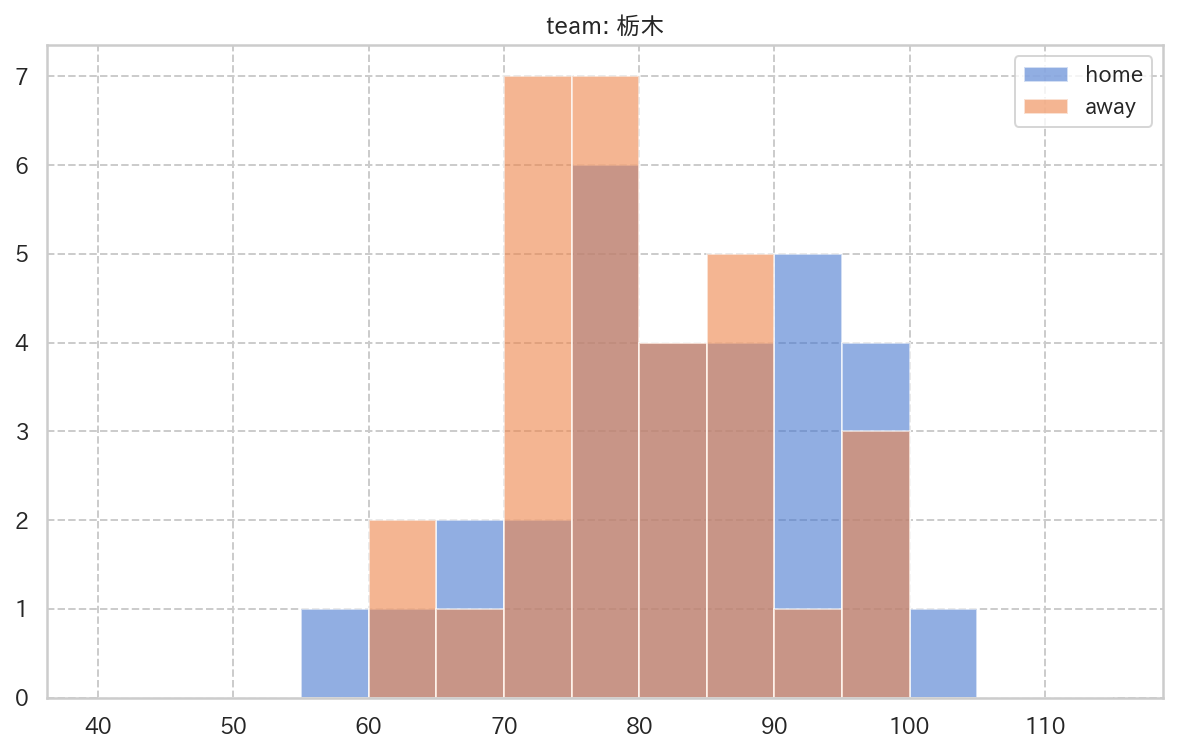

In [96]:
for team in game_count.index.values:
    result_team = result_df.query(f"away_team == \'{team}\' or home_team == \'{team}\'").copy()
    result_team["is_home"] = result_team.home_team == team
    result_team["my_score"] = np.where(result_team.is_home, result_team.home_score, result_team.away_score)
    draw_timeseries_score(result_team)
    draw_score_hist(result_team)